## Tobigs 1주차 EDA 과제
#### 15기 이윤정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

----
### part1. 데이터 불러오기

In [2]:
data=pd.read_csv("C:/Users/tldus/Desktop/투빅스/강의자료/week1_EDA/과제데이터.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 변수 설명
#### 독립변수
- datetime : date와 hour 변수로 분리

수치형
- temp : 섭씨 온도
- atemp : 섭씨 체감온도
- humidity : 습도
- windspeed : 풍속 
- casual : 비가입자의 대여량
- regustered : 가입자의 대여량

범주형
- season : 1=봄 / 2=여름 / 3=가을 / 4=겨울
- holiday : 해당일이 휴일인지 아닌지의 여부
- workingday : 해당일이 주말도 휴일도 아닌지의 여부 
- weather : 1=화창, 약간의 구름 / 2=안개 / 3=약간의 눈, 비, 폭풍우 / 4=폭우, 눈, 우박, 폭풍우

#### 종속변수
- count : 총 대여량

----
### part2. 데이터 전처리

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
#시간대 변수 생성
time=[]

for i in range(0,10886):
    tt = str(data['datetime'].iloc[i])[10:13]
    time.append(str(tt))
    
time=pd.DataFrame(time)
time.columns = ['hour']

data=pd.concat([data, time], axis=1)
data = data.astype({'hour': 'int'})
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


In [5]:
#date 변수 생성
time=[]

for i in range(0,10886):
    tt = str(data['datetime'].iloc[i])[0:10]
    time.append(str(tt))
    
time=pd.DataFrame(time)
time.columns = ['date']

data=pd.concat([data, time], axis=1)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012-12-19


In [6]:
#datetime 변수 삭제
data=data.drop('datetime', axis=1)
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011-01-01
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011-01-01
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012-12-19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012-12-19
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012-12-19
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012-12-19


holiday 변수와 workingday 변수를 구분하는 것은 의미없다고 판단 >> holiday 변수 삭제

In [7]:
#holiday 변수 삭제
data=data.drop('holiday', axis=1)

In [8]:
#전체 데이터셋 결측치 확인
data.isnull().sum() 

season        0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
date          0
dtype: int64

In [9]:
num = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"] #수치형 변수들
data[num].describe() #기초통계량

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F12040B388>,
      dtype=object)

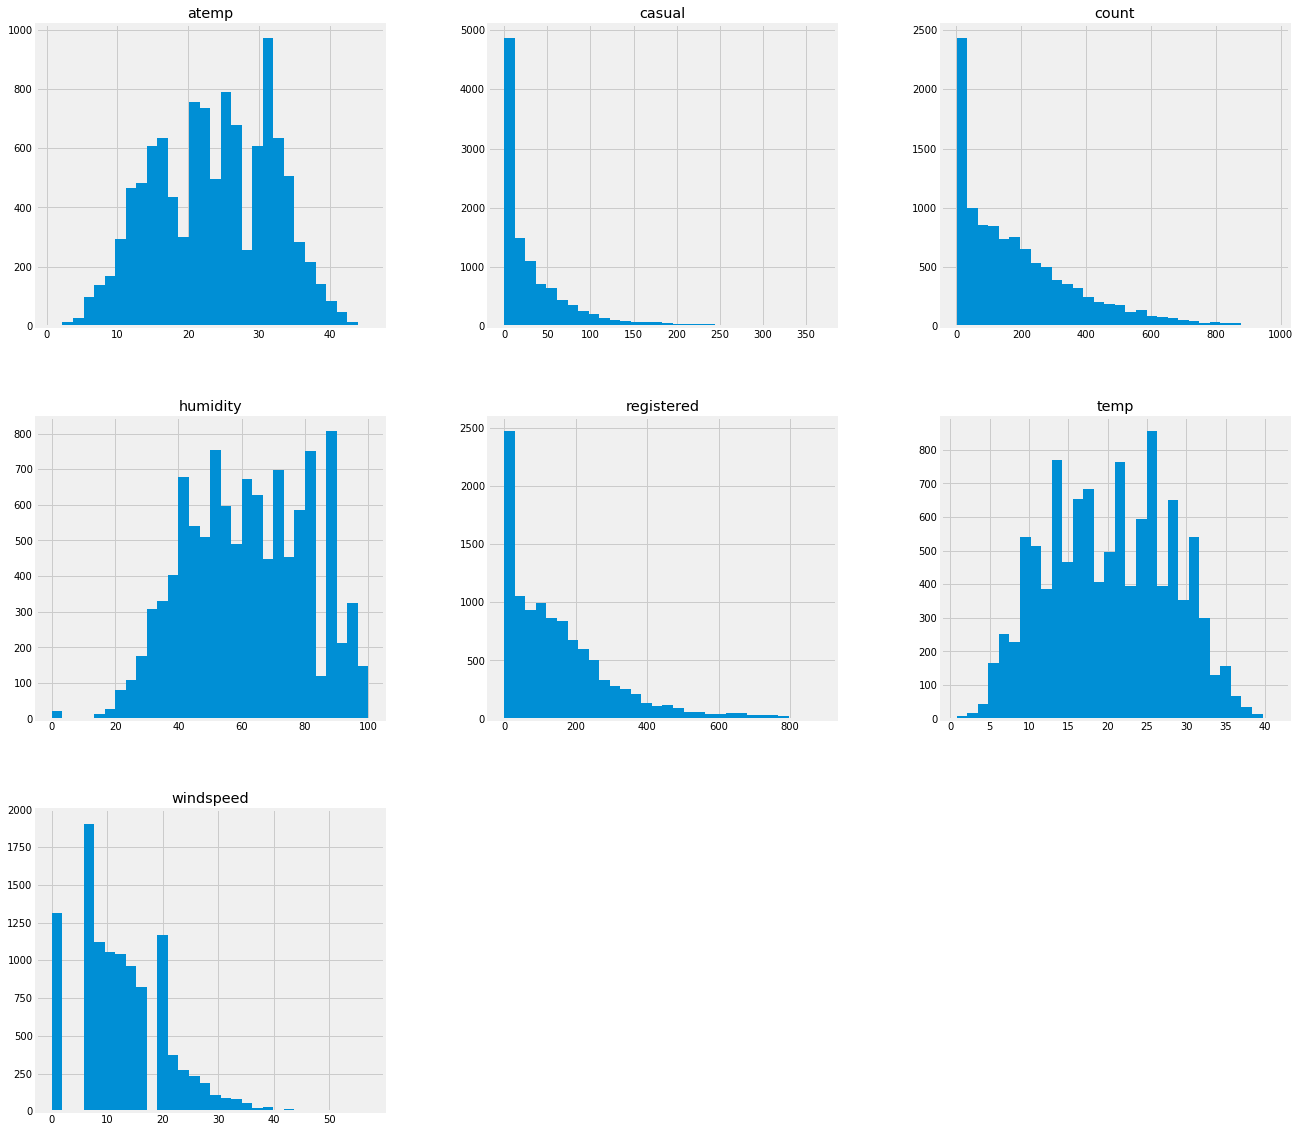

In [10]:
#수치형 변수의 분포 확인
data[num].hist(bins=30, figsize=(20, 20))

- humidity 변수에 이상치 존재 >> humidity == 0일때
- windspeed 변수는 좀 더 살펴볼 필요 존재!

#### 'humidity' 변수 결측치 처리

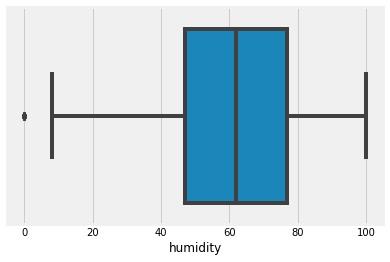

In [11]:
#해당 변수의 boxplot을 통해 이상치 확인
sns.boxplot(data['humidity'])

In [12]:
#이상치 (humidity==0) 확인
data[data['humidity']==0]

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date
1091,1,1,3,13.94,15.910,0,16.9979,3,0,3,0,2011-03-10
1092,1,1,3,13.94,15.910,0,16.9979,0,2,2,1,2011-03-10
1093,1,1,3,13.94,15.910,0,16.9979,0,1,1,2,2011-03-10
1094,1,1,3,14.76,17.425,0,12.9980,1,2,3,5,2011-03-10
1095,1,1,3,14.76,16.665,0,22.0028,0,12,12,6,2011-03-10
1096,1,1,3,15.58,19.695,0,15.0013,1,36,37,7,2011-03-10
1097,1,1,3,15.58,19.695,0,19.0012,1,43,44,8,2011-03-10
1098,1,1,3,16.40,20.455,0,15.0013,1,23,24,9,2011-03-10
1099,1,1,3,16.40,20.455,0,11.0014,0,17,17,10,2011-03-10
1100,1,1,3,16.40,20.455,0,16.9979,6,5,11,11,2011-03-10


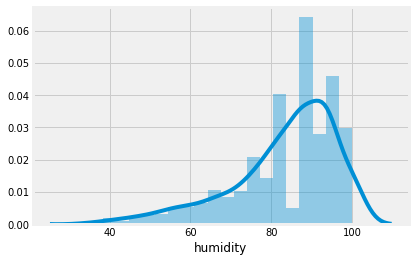

In [13]:
weather3 = data['weather'] == 3
humid0 = data['humidity'] != 0

s3=data[weather3 & humid0]

sns.distplot(s3['humidity'])

- humidity가 0인 데이터를 확인해본 결과, 계절은 봄인 반면 날씨는 약한 눈/비/폭풍우로 예측된다.
- 날씨가 약한 눈/비/폭풍우인 데이터를 확인해본 결과, humidity가 0인 것은 이상치임을 확인할 수 있다.

In [14]:
#이상치와 동일한 조건(계절과 날씨)을 가진 데이터 추출
season1 = data['season'] == 1

ws = data[weather3 & season1]
ws

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date
18,1,0,3,17.22,21.210,88,16.9979,9,26,35,18,2011-01-01
19,1,0,3,17.22,21.210,88,16.9979,6,31,37,19,2011-01-01
29,1,0,3,17.22,21.210,77,19.9995,0,2,2,6,2011-01-02
31,1,0,3,16.40,20.455,71,15.0013,0,8,8,8,2011-01-02
37,1,0,3,14.76,17.425,76,12.9980,4,55,59,14,2011-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...
6704,1,1,3,18.86,22.725,82,7.0015,19,88,107,15,2012-03-16
6705,1,1,3,19.68,23.485,77,0.0000,18,111,129,16,2012-03-16
6706,1,1,3,19.68,23.485,82,6.0032,23,235,258,17,2012-03-16
6707,1,1,3,19.68,23.485,82,6.0032,31,377,408,18,2012-03-16


In [15]:
#해당 데이터들의 시간대 별 기댓값을 통해 결측치 처리
humid_perc = ws["humidity"].groupby(ws['hour']).mean()
humid_perc = humid_perc.drop([humid_perc.index[3], humid_perc.index[4]]) #이상치 데이터에 새벽 3, 4시 데이터는 존재하지 않으므로 제거
humid_perc

hour
0     78.250000
1     81.384615
2     77.909091
5     74.727273
6     77.272727
7     79.600000
8     79.727273
9     77.285714
10    71.166667
11    63.000000
12    64.250000
13    61.750000
14    73.285714
15    71.875000
16    73.000000
17    79.500000
18    73.923077
19    78.333333
20    79.000000
21    75.900000
22    86.833333
23    72.444444
Name: humidity, dtype: float64

In [16]:
#이상치 데이터에 동일한 조건의 시간대 별 기댓값 대입
for i in range(0,22):
    if i < 3:
        data.iloc[i+1091, 5] = humid_perc[i]
    else:
        data.iloc[i+1091, 5] = humid_perc[i+2]
data

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date
0,1,0,1,9.84,14.395,81.0,0.0000,3,13,16,0,2011-01-01
1,1,0,1,9.02,13.635,80.0,0.0000,8,32,40,1,2011-01-01
2,1,0,1,9.02,13.635,80.0,0.0000,5,27,32,2,2011-01-01
3,1,0,1,9.84,14.395,75.0,0.0000,3,10,13,3,2011-01-01
4,1,0,1,9.84,14.395,75.0,0.0000,0,1,1,4,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,19.695,50.0,26.0027,7,329,336,19,2012-12-19
10882,4,1,1,14.76,17.425,57.0,15.0013,10,231,241,20,2012-12-19
10883,4,1,1,13.94,15.910,61.0,15.0013,4,164,168,21,2012-12-19
10884,4,1,1,13.94,17.425,61.0,6.0032,12,117,129,22,2012-12-19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F121231BC8>,
      dtype=object)

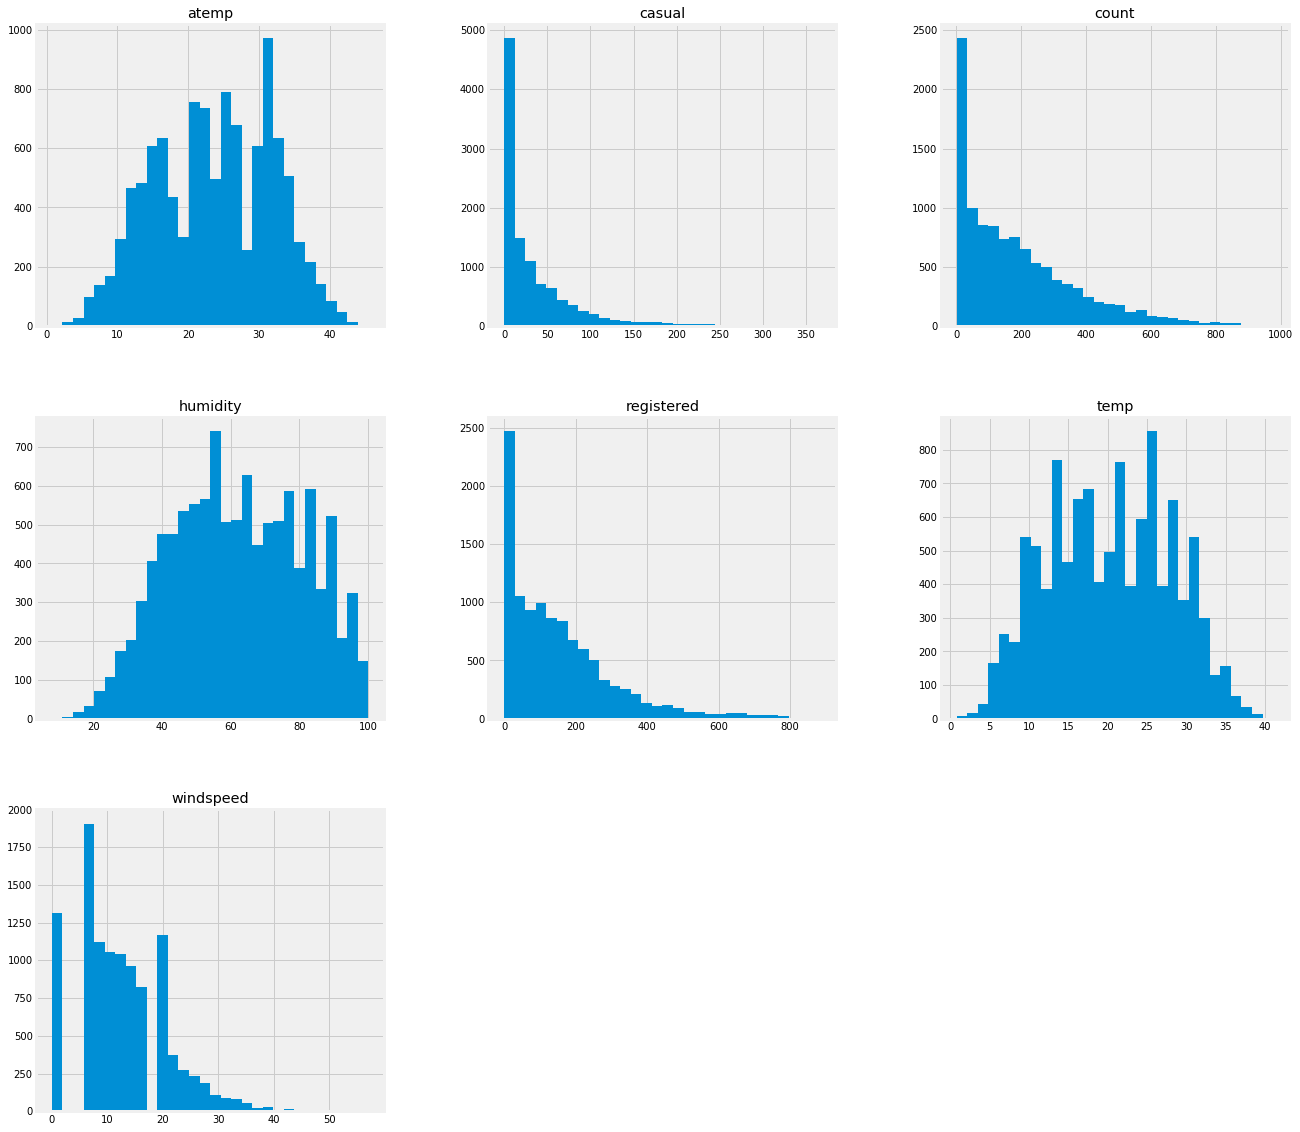

In [17]:
#결측치(이상치) 처리 후 수치형 변수의 분포 확인
data[num].hist(bins=30, figsize=(20, 20))

#### windspeed 변수

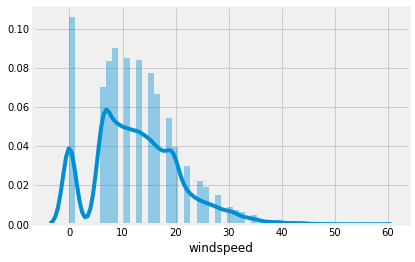

In [18]:
sns.distplot(data['windspeed'])

In [19]:
weather1 = data['weather'] == 1
weather2 = data['weather'] == 2
weather3 = data['weather'] == 3
wind0 = data['windspeed'] != 0

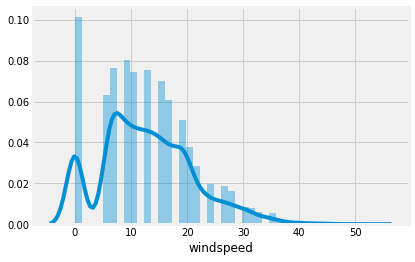

In [20]:
w1 = data[weather1]

sns.distplot(w1['windspeed'])

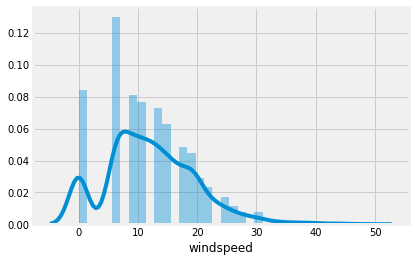

In [21]:
w2 = data[weather2]

sns.distplot(w2['windspeed'])

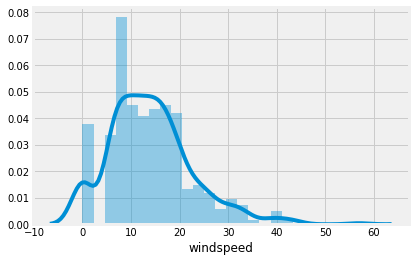

In [22]:
w3 = data[weather3]

sns.distplot(w3['windspeed'])

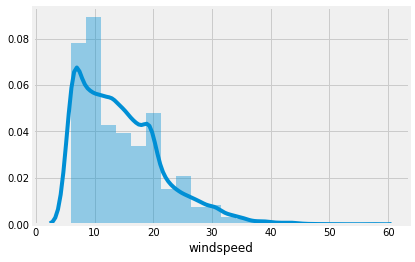

In [23]:
data = data[wind0]

sns.distplot(data['windspeed'], bins=20)

windspeed == 0 인 데이터 제거

#### 수치형 변수 간 상관관계

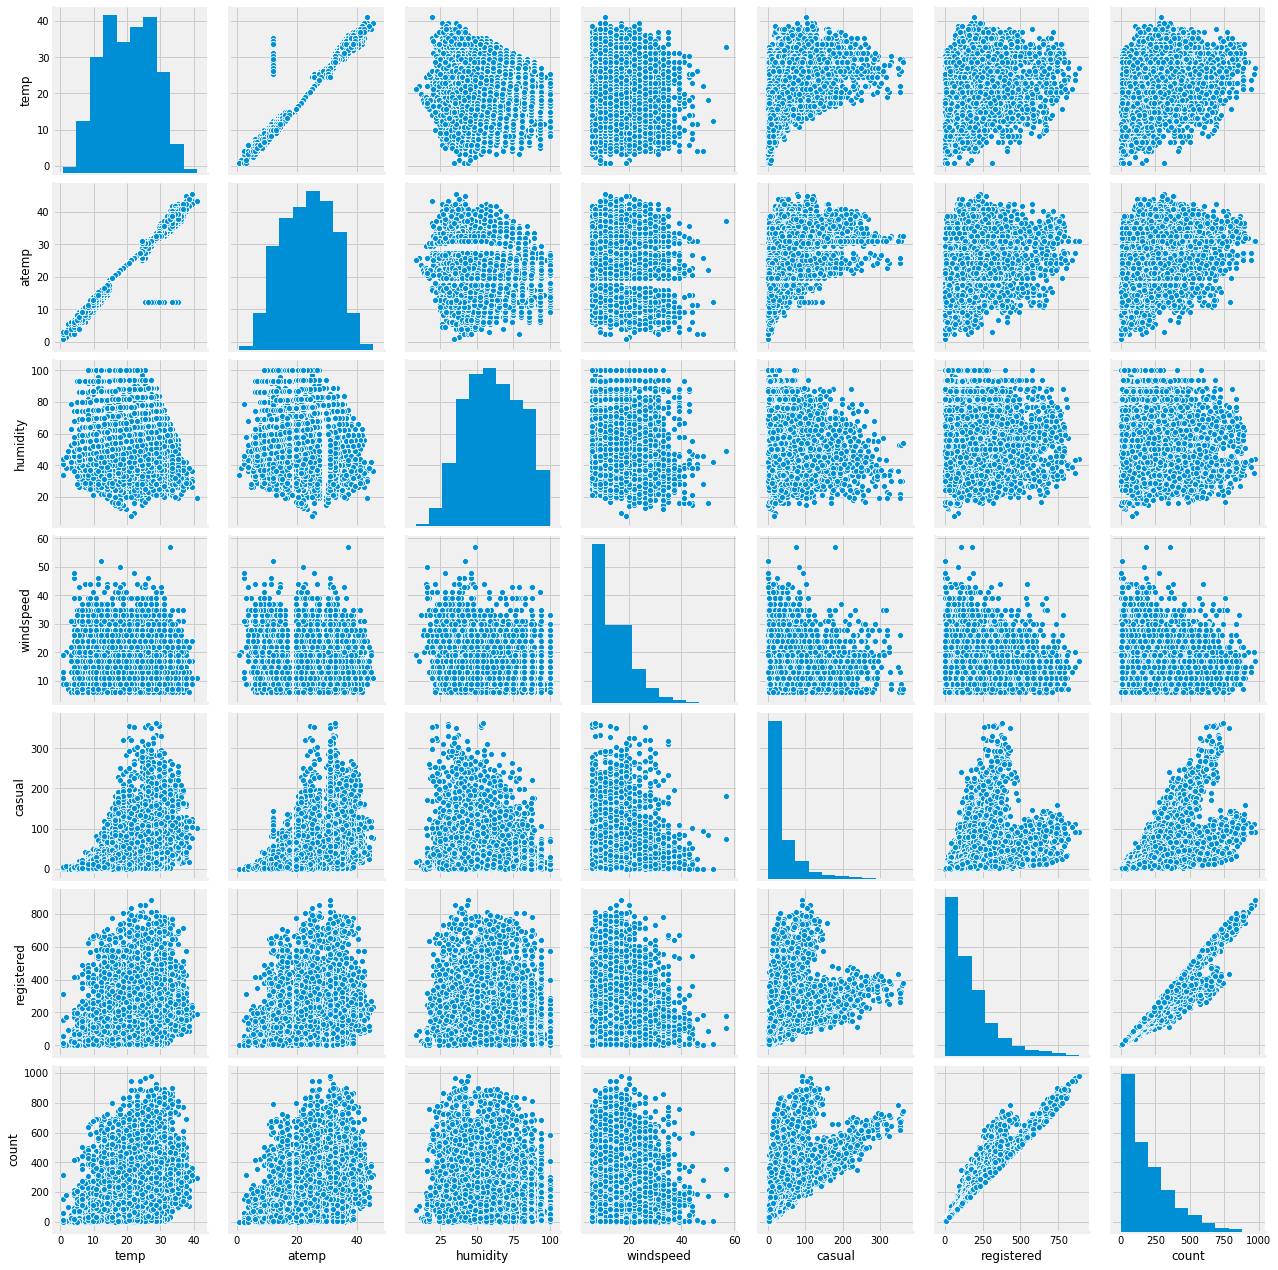

In [24]:
num = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"] #수치형 변수들
sns.pairplot(data[num])

In [25]:
data[num].corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984980,-0.047149,-0.038902,0.470115,0.322736,0.399011
atemp,0.984980,1.000000,-0.027364,-0.068576,0.464872,0.319025,0.394468
humidity,-0.047149,-0.027364,1.000000,-0.328000,-0.340604,-0.267777,-0.317408
windspeed,-0.038902,-0.068576,-0.328000,1.000000,0.085342,0.073669,0.085014
casual,0.470115,0.464872,-0.340604,0.085342,1.000000,0.494938,0.688961
registered,0.322736,0.319025,-0.267777,0.073669,0.494938,1.000000,0.970791
count,0.399011,0.394468,-0.317408,0.085014,0.688961,0.970791,1.000000


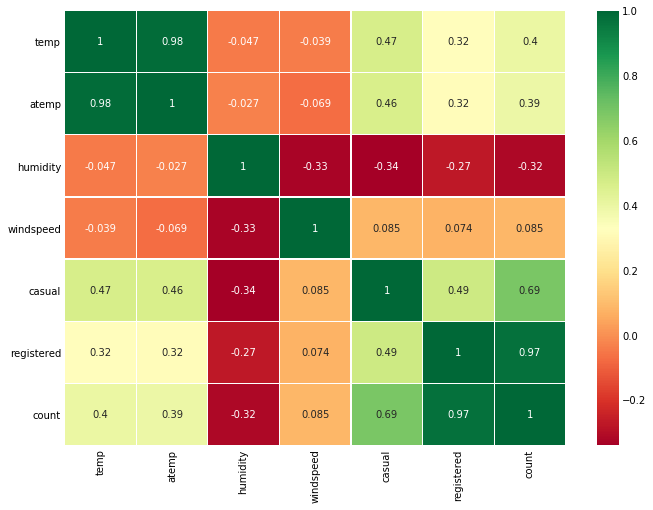

In [26]:
sns.heatmap(data[num].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- temp 변수와 atemp 변수 간의 상관관계가 매우 높음
- registered 변수와 count 변수 간의 상관관계가 매우 높음
- casual 변수와 count 변수 간의 상관관계가 존재

#### 변수 변환

In [27]:
data['log_casual'] = data['casual'].transform(np.log)
data['log_count'] = data['count'].transform(np.log)
data['log_registered'] = data['registered'].transform(np.log)

data

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,log_casual,log_count,log_registered
5,1,0,2,9.84,12.880,75.0,6.0032,0,1,1,5,2011-01-01,-inf,0.000000,0.000000
10,1,0,1,15.58,19.695,76.0,16.9979,12,24,36,10,2011-01-01,2.484907,3.583519,3.178054
11,1,0,1,14.76,16.665,81.0,19.0012,26,30,56,11,2011-01-01,3.258097,4.025352,3.401197
12,1,0,1,17.22,21.210,77.0,19.0012,29,55,84,12,2011-01-01,3.367296,4.430817,4.007333
13,1,0,2,18.86,22.725,72.0,19.9995,47,47,94,13,2011-01-01,3.850148,4.543295,3.850148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,19.695,50.0,26.0027,7,329,336,19,2012-12-19,1.945910,5.817111,5.796058
10882,4,1,1,14.76,17.425,57.0,15.0013,10,231,241,20,2012-12-19,2.302585,5.484797,5.442418
10883,4,1,1,13.94,15.910,61.0,15.0013,4,164,168,21,2012-12-19,1.386294,5.123964,5.099866
10884,4,1,1,13.94,17.425,61.0,6.0032,12,117,129,22,2012-12-19,2.484907,4.859812,4.762174


In [28]:
data['log_casual'].unique()

array([      -inf, 2.48490665, 3.25809654, 3.36729583, 3.8501476 ,
       3.55534806, 3.68887945, 3.71357207, 2.7080502 , 2.19722458,
       1.79175947, 2.39789527, 1.09861229, 1.38629436, 0.        ,
       0.69314718, 1.94591015, 2.77258872, 2.99573227, 2.94443898,
       2.30258509, 1.60943791, 2.56494936, 2.07944154, 2.63905733,
       2.89037176, 2.83321334, 3.04452244, 3.49650756, 3.13549422,
       3.09104245, 3.33220451, 3.95124372, 3.73766962, 3.40119738,
       3.29583687, 3.4657359 , 3.17805383, 4.06044301, 4.12713439,
       3.93182563, 3.21887582, 3.4339872 , 4.07753744, 3.80666249,
       4.29045944, 4.00733319, 4.21950771, 3.52636052, 3.63758616,
       4.62497281, 4.4308168 , 3.66356165, 3.58351894, 3.76120012,
       3.8286414 , 4.09434456, 4.38202663, 4.41884061, 4.30406509,
       3.61091791, 4.24849524, 4.39444915, 4.60517019, 4.59511985,
       3.98898405, 4.47733681, 4.57471098, 4.9698133 , 5.00394631,
       4.82028157, 4.58496748, 3.87120101, 3.91202301, 4.27666

In [29]:
data['log_registered'].unique()

array([0.        , 3.17805383, 3.40119738, 4.00733319, 3.8501476 ,
       4.26267988, 4.24849524, 3.95124372, 3.25809654, 3.4339872 ,
       3.21887582, 2.83321334, 2.56494936, 2.77258872, 2.07944154,
       1.38629436, 0.69314718, 2.94443898, 3.8286414 , 3.98898405,
       4.29045944, 4.15888308, 4.20469262, 4.06044301, 3.76120012,
       3.36729583, 2.99573227, 2.19722458, 1.60943791, 1.09861229,
       4.14313473, 5.03043792, 4.39444915, 3.49650756, 3.71357207,
       3.87120101, 3.97029191, 4.18965474, 4.98360662, 4.99721227,
       3.8918203 , 2.39789527, 3.58351894, 4.52178858, 5.17614973,
       4.58496748, 3.61091791, 3.91202301, 4.36944785, 4.21950771,
       5.3082677 , 5.18738581, 4.70048037, 3.52636052, 1.79175947,
       4.46590812, 5.25749537, 4.69134788, 4.30406509, 4.17438727,
       4.44265126, 5.22574667, 5.11198779, 4.84418709, 4.40671925,
       3.68887945, 4.04305127, 4.07753744, 5.0937502 , 5.06259503,
       3.93182563, 4.33073334, 5.24702407, 4.82831374, 4.75359

In [30]:
data['log_count'].unique()

array([0.        , 3.58351894, 4.02535169, 4.4308168 , 4.54329478,
       4.66343909, 4.70048037, 4.53259949, 4.20469262, 3.55534806,
       3.61091791, 3.52636052, 3.33220451, 3.66356165, 2.83321334,
       2.19722458, 1.79175947, 1.09861229, 0.69314718, 2.07944154,
       2.99573227, 3.97029191, 4.24849524, 4.31748811, 4.07753744,
       4.30406509, 4.33073334, 4.17438727, 3.40119738, 3.09104245,
       3.4339872 , 1.60943791, 4.15888308, 5.0369526 , 4.47733681,
       3.78418963, 3.93182563, 4.11087386, 4.34380542, 4.27666612,
       5.05624581, 3.95124372, 2.48490665, 1.38629436, 5.18738581,
       4.60517019, 3.73766962, 4.04305127, 4.35670883, 4.57471098,
       4.14313473, 4.41884061, 5.35658627, 5.20400669, 4.71849887,
       3.98898405, 2.39789527, 3.49650756, 5.27299956, 4.74493213,
       3.8286414 , 4.36944785, 4.26267988, 4.12713439, 4.48863637,
       5.24702407, 5.12989871, 4.88280192, 3.76120012, 4.4543473 ,
       5.14749448, 5.0937502 , 4.2341065 , 3.87120101, 3.13549

In [31]:
data_inf = data[data['log_casual']>0] #`log_casual` 변수의 -inf 제거
df = data_inf[data_inf['log_registered']>0] #`log_registered` 변수의 -inf 제거
df=df.reset_index()
df

,index,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,log_casual,log_count,log_registered
0,10,1,0,1,15.58,19.695,76.0,16.9979,12,24,36,10,2011-01-01,2.484907,3.583519,3.178054
1,11,1,0,1,14.76,16.665,81.0,19.0012,26,30,56,11,2011-01-01,3.258097,4.025352,3.401197
2,12,1,0,1,17.22,21.210,77.0,19.0012,29,55,84,12,2011-01-01,3.367296,4.430817,4.007333
3,13,1,0,2,18.86,22.725,72.0,19.9995,47,47,94,13,2011-01-01,3.850148,4.543295,3.850148
4,14,1,0,2,18.86,22.725,72.0,19.0012,35,71,106,14,2011-01-01,3.555348,4.663439,4.262680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8167,10881,4,1,1,15.58,19.695,50.0,26.0027,7,329,336,19,2012-12-19,1.945910,5.817111,5.796058
8168,10882,4,1,1,14.76,17.425,57.0,15.0013,10,231,241,20,2012-12-19,2.302585,5.484797,5.442418
8169,10883,4,1,1,13.94,15.910,61.0,15.0013,4,164,168,21,2012-12-19,1.386294,5.123964,5.099866
8170,10884,4,1,1,13.94,17.425,61.0,6.0032,12,117,129,22,2012-12-19,2.484907,4.859812,4.762174


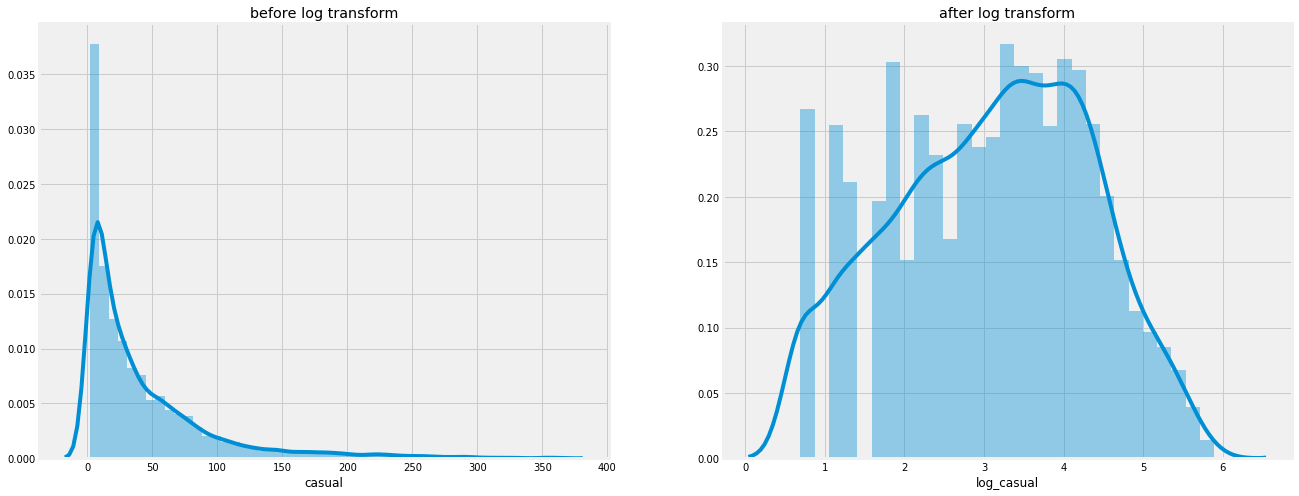

In [32]:
#casual 변수
f,ax=plt.subplots(1,2,figsize=(20,8))  #plot field

sns.distplot(df['casual'], ax=ax[0])
ax[0].set_title('before log transform')
sns.distplot(df['log_casual'], ax=ax[1])
ax[1].set_title('after log transform')

plt.show()

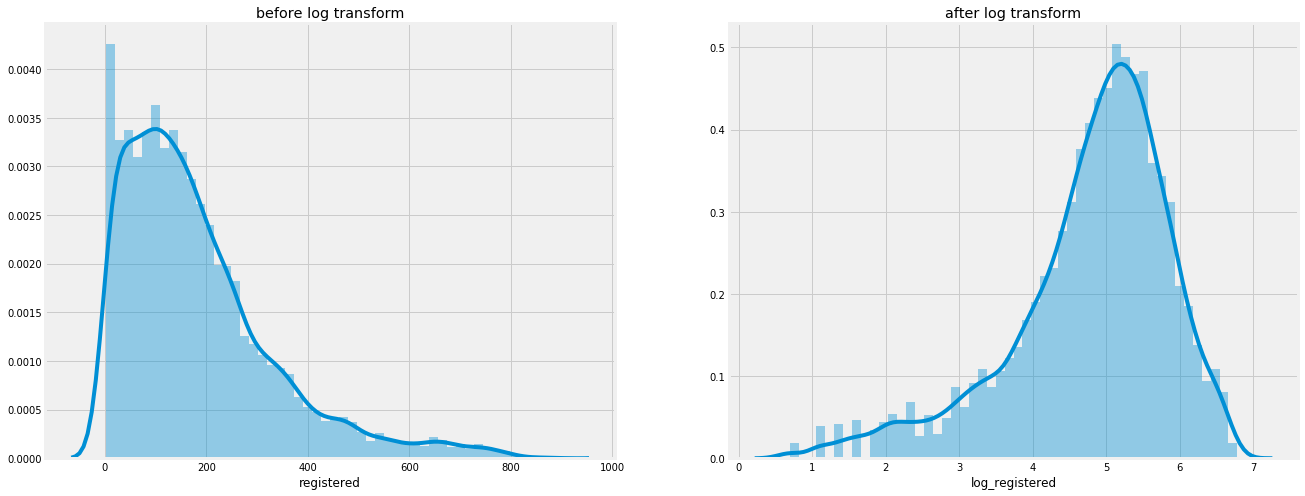

In [33]:
#casual 변수
f,ax=plt.subplots(1,2,figsize=(20,8))  #plot field

sns.distplot(df['registered'], ax=ax[0])
ax[0].set_title('before log transform')
sns.distplot(df['log_registered'], ax=ax[1])
ax[1].set_title('after log transform')

plt.show()

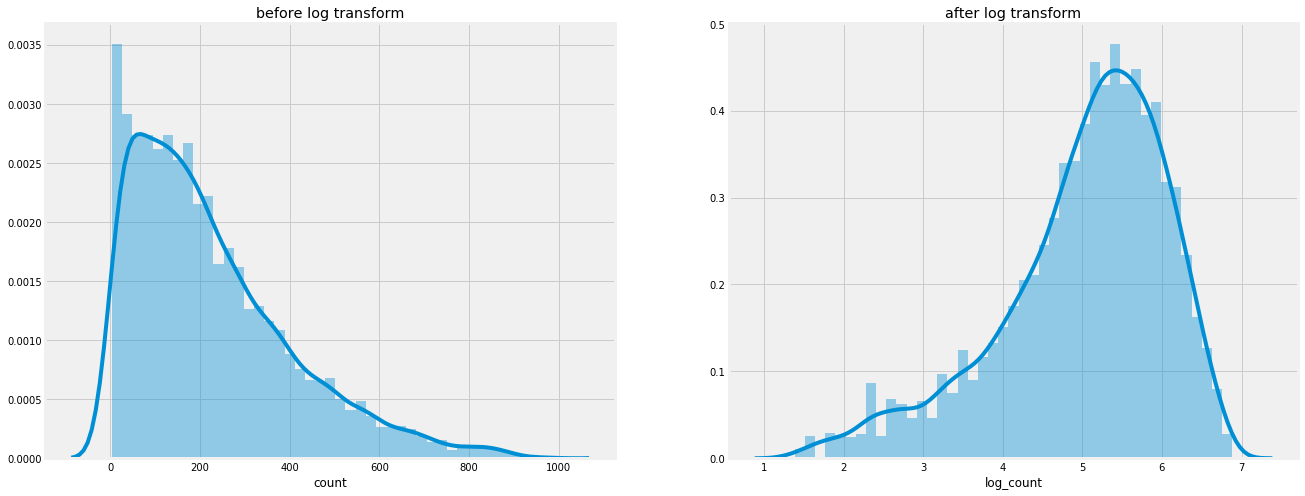

In [34]:
#casual 변수
f,ax=plt.subplots(1,2,figsize=(20,8))  #plot field

sns.distplot(df['count'], ax=ax[0])
ax[0].set_title('before log transform')
sns.distplot(df['log_count'], ax=ax[1])
ax[1].set_title('after log transform')

plt.show()

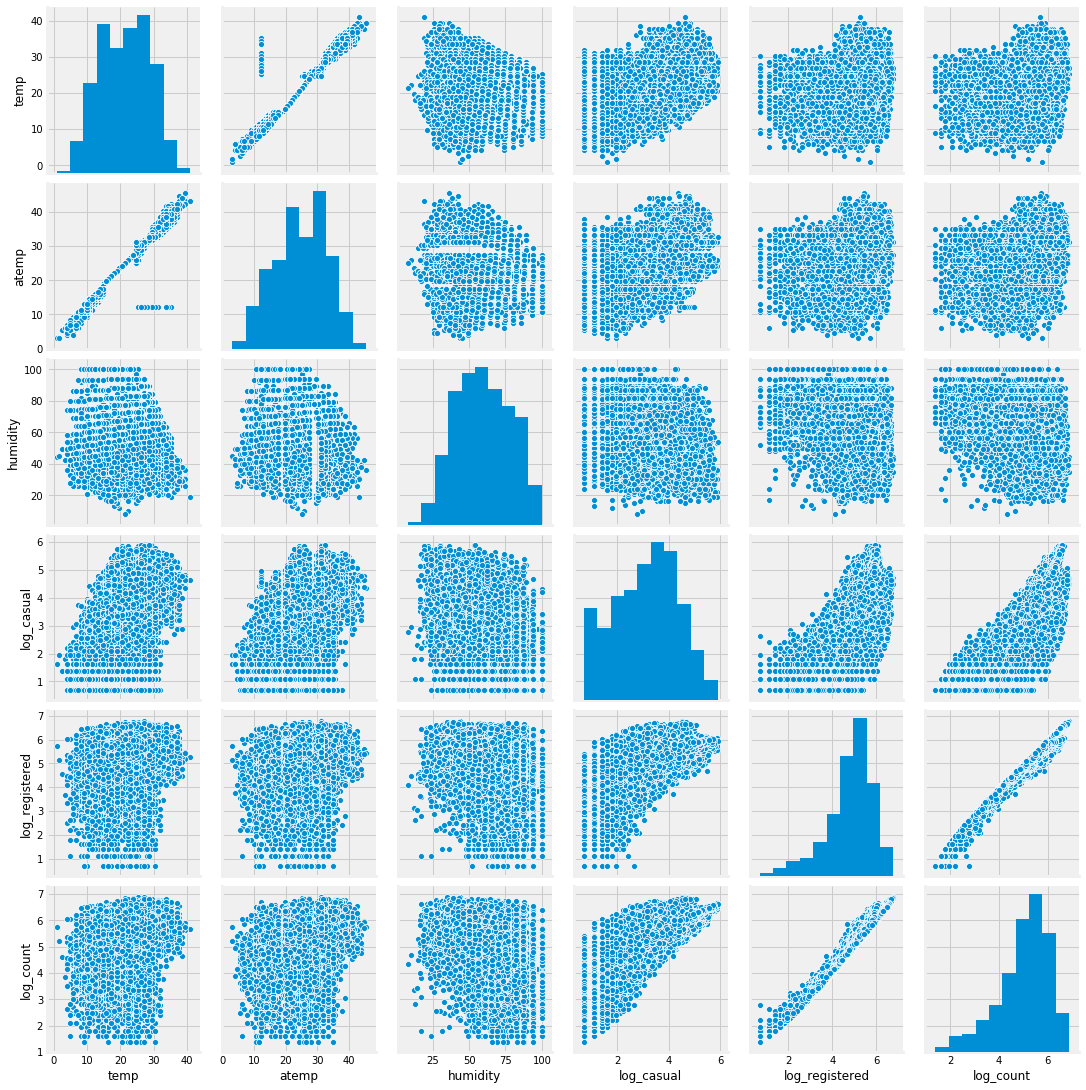

In [35]:
lognum = ["temp", "atemp", "humidity", "log_casual", "log_registered", "log_count"] #수치형 변수 + 로그변환 변수
sns.pairplot(df[lognum])

----
### Part3. 데이터 분석

#### 계절별 분석
1. 총 대여량

Text(0.5, 1.0, 'average of "count" by "season"')

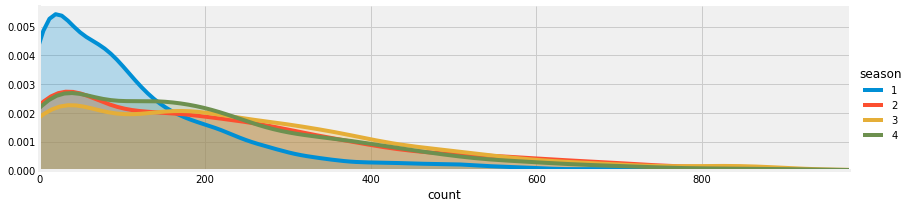

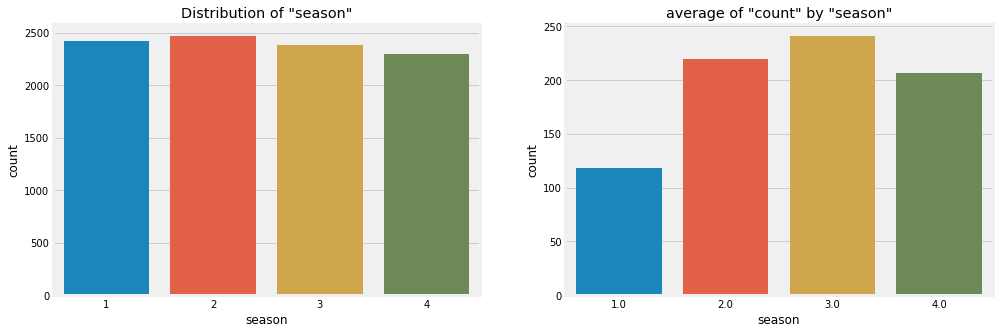

In [36]:
#season - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="season", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,2,figsize=(15,5))  #plot field

sns.countplot(x='season', data=data, ax=ax[0])  #season 변수 분포
ax[0].set_title('Distribution of "season"')

count_perc = data[["count","season"]].groupby(data['season'],as_index=False).mean()
sns.barplot(x='season', y='count', data=count_perc,ax=ax[1])  #season 변수별 평균 대여량
ax[1].set_title('average of "count" by "season"')

In [37]:
count_perc

,count,season
0,118.307470,1.0
1,218.991481,2.0
2,240.266051,3.0
3,206.308862,4.0


- 가을 > 여름 > 겨울 > 봄 순으로 대여량이 많다

2. 비 가입자의 대여량

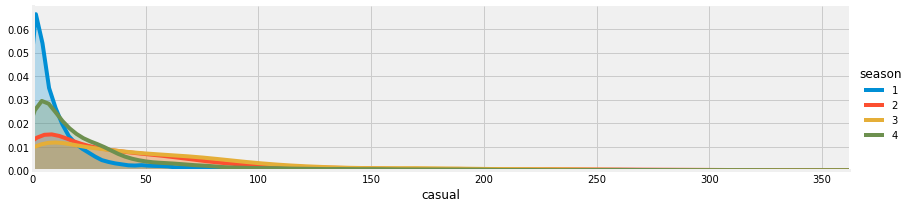

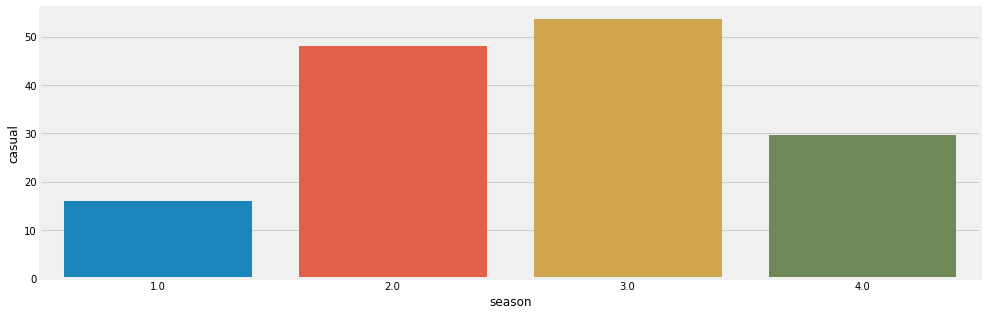

In [38]:
#season - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="season", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

casual_perc = data[["casual","season"]].groupby(data['season'],as_index=False).mean()
sns.barplot(x='season', y='casual', data=casual_perc)  #season 변수별 평균 대여량

In [39]:
casual_perc

,casual,season
0,16.011969,1.0
1,48.086004,2.0
2,53.546790,3.0
3,29.569505,4.0


- 가을 > 여름 > 겨울 > 봄 순으로 대여량이 많다

3. 가입자의 대여량

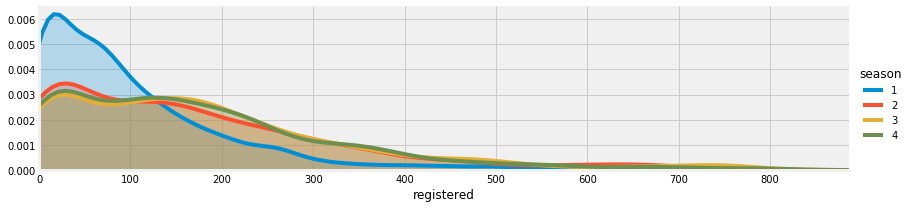

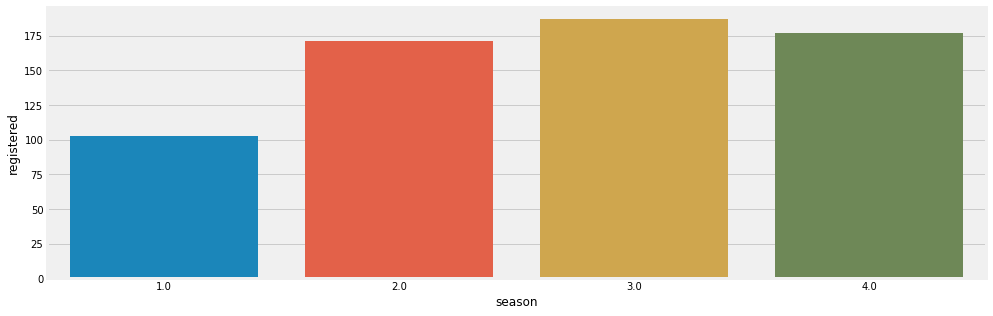

In [40]:
#season - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="season", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

registered_perc = data[["registered","season"]].groupby(data['season'],as_index=False).mean()
sns.barplot(x='season', y='registered', data=registered_perc)  #season 변수별 평균 대여량

In [41]:
registered_perc

,registered,season
0,102.295501,1.0
1,170.905477,2.0
2,186.719261,3.0
3,176.739357,4.0


- 가을 > 겨울 > 여름 > 봄 순으로 대여량이 많다

- 총 대여량 : 가을 > 여름 > 겨울 > 봄
- 비 가입자의 대여량 : 가을 > 여름 > 겨울 > 봄
- 가입자의 대여량 : 가을 > 겨울 > 여름 > 봄

대여량을 살펴본 결과, 모든 양상에서 계절이 가을일 때 대여량이 가장 많고 봄일 때 대여량이 가장 적은 것을 확인할 수 있었다. 
그러나, 가입자의 경우 계절이 겨울일 때가 여름일 때보다 대여량이 많다.

---
#### 날씨별 분석
1. 총 대여량

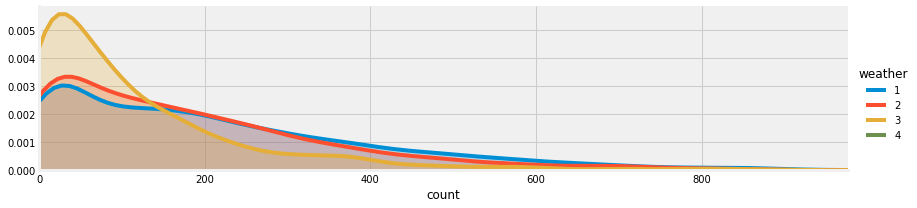

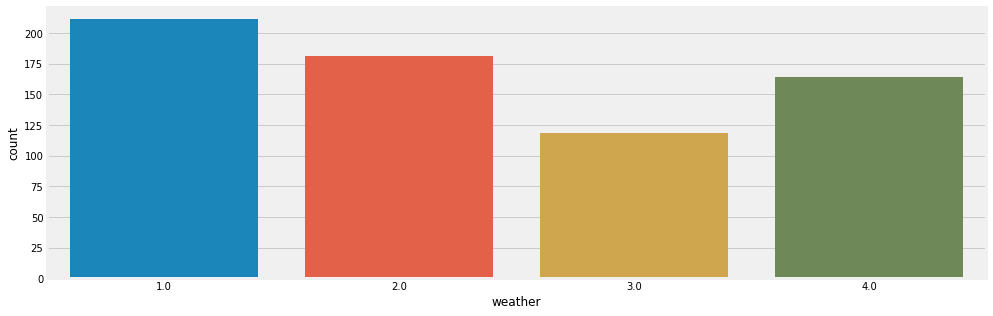

In [42]:
#weather - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="weather", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_w = data[["count","weather"]].groupby(data['weather'],as_index=False).mean()
sns.barplot(x='weather', y='count', data=count_w)  #weather 변수별 평균 대여량

In [43]:
data[data['weather']==4]

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,log_casual,log_count,log_registered
5631,1,1,4,8.2,11.365,86.0,6.0032,6,158,164,18,2012-01-09,1.791759,5.099866,5.062595


weather 변수의 분포를 살펴본 결과, weather가 '4'일때 데이터는 총 10886건 중 1건이다. 해당 경우는 특수한 케이스이므로 제거하였다. 

In [44]:
data = data[data['weather']!=4]

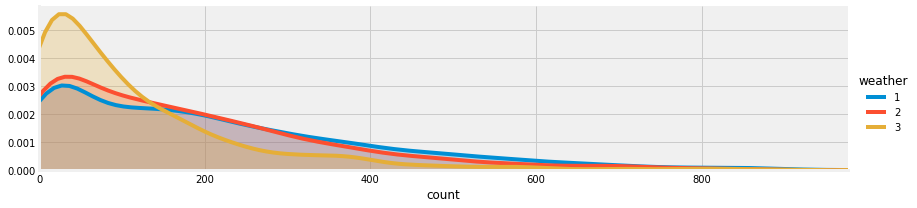

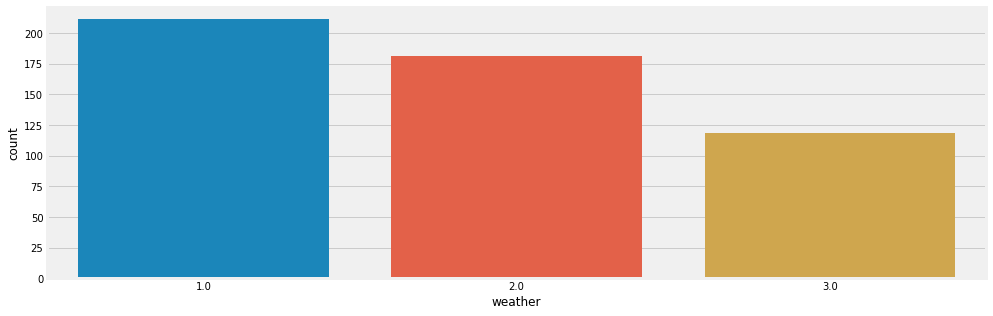

In [45]:
#weather - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="weather", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_w = data[["count","weather"]].groupby(data['weather'],as_index=False).mean()
sns.barplot(x='weather', y='count', data=count_w)  #weather 변수별 평균 대여량

In [46]:
count_w

,count,weather
0,211.034812,1.0
1,181.618990,2.0
2,118.273885,3.0


- 맑거나 약간 구름 낀날 > 안개 > 약간 눈 & 비 & 폭풍우 순으로 대여량이 많다

2. 비 가입자의 대여량

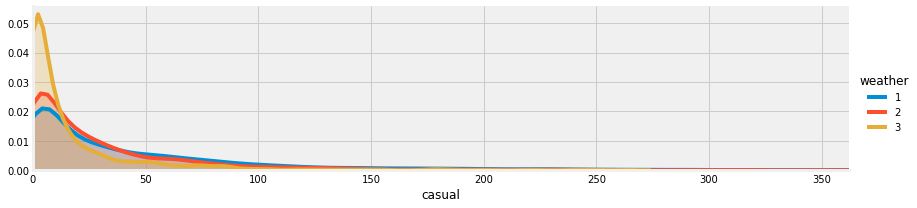

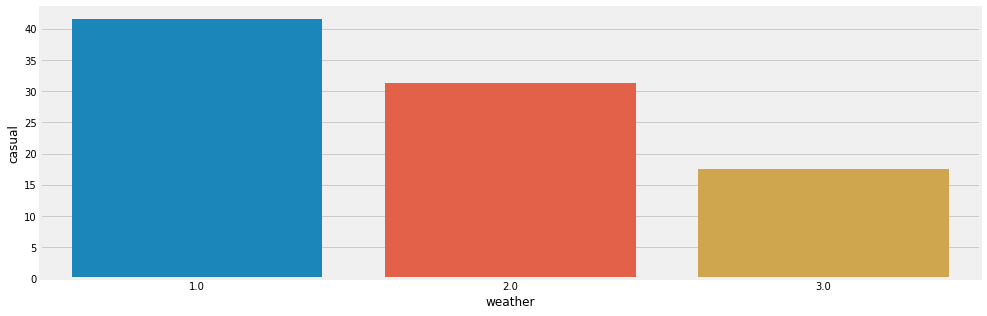

In [47]:
#weather - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="weather", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

casual_w = data[["casual","weather"]].groupby(data['weather'],as_index=False).mean()
sns.barplot(x='weather', y='casual', data=casual_w)  #weather 변수별 평균 대여량

In [48]:
casual_w

,casual,weather
0,41.485455,1.0
1,31.364583,2.0
2,17.481529,3.0


- 맑거나 약간 구름 낀날 > 안개 > 약간 눈 & 비 & 폭풍우 순으로 대여량이 많다

3. 가입자의 대여량

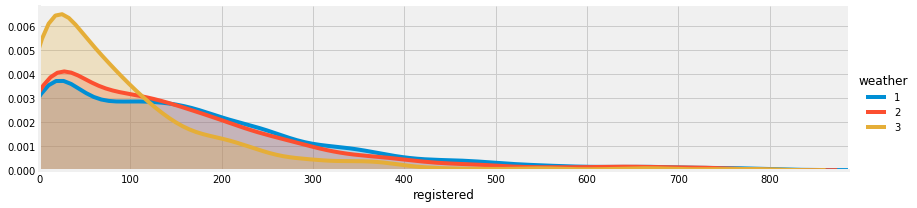

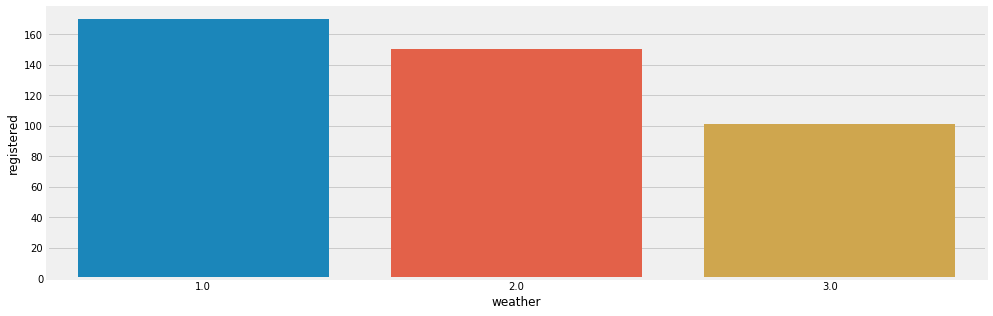

In [49]:
#weather - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="weather", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

registered_c = data[["registered","weather"]].groupby(data['weather'],as_index=False).mean()
sns.barplot(x='weather', y='registered', data=registered_c)  #weather 변수별 평균 대여량

In [50]:
registered_c

,registered,weather
0,169.549356,1.0
1,150.254407,2.0
2,100.792357,3.0


- 맑거나 약간 구름 낀날 > 안개 > 약간 눈 & 비 & 폭풍우 순으로 대여량이 많다

비 가입자, 가입자, 총 대여량 모두 맑거나 약간 구름 낀날 > 안개 > 약간 눈 & 비 & 폭풍우 순으로 대여량이 많다

----
#### 날씨의 세부사항별 분석 (온도, 체감 온도, 습도, 풍속)
1. 온도

1. 총 대여량

In [51]:
#temp 범주화
#5단위로 분할
bins = np.linspace(0, 45, 6)
bins

array([ 0.,  9., 18., 27., 36., 45.])

In [52]:
data['temp_G'] = np.digitize(data['temp'], bins)
data.groupby('temp_G')['temp'].size()

temp_G
1     622
2    3240
3    3365
4    2240
5     105
Name: temp, dtype: int64

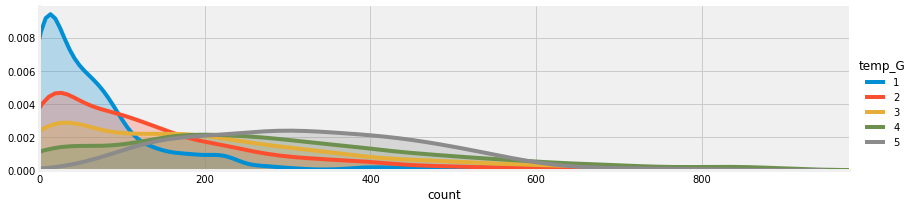

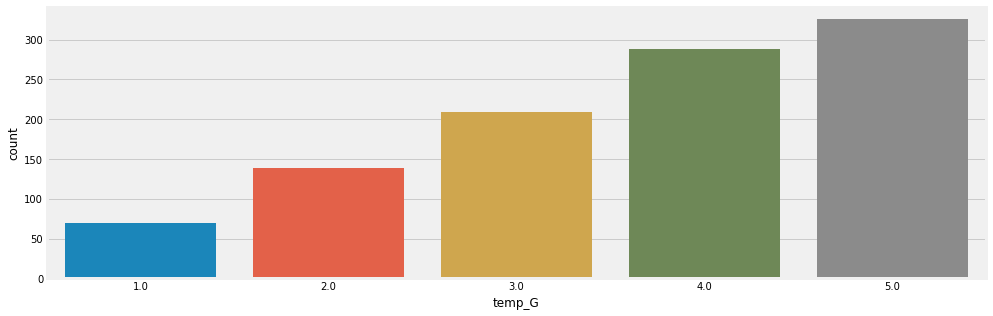

In [53]:
#temp_G - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="temp_G", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_t = data[["count","temp_G"]].groupby(data['temp_G'],as_index=False).mean()
sns.barplot(x='temp_G', y='count', data=count_t)  #temp_G 변수별 평균 대여량

In [54]:
count_t

,count,temp_G
0,69.504823,1.0
1,138.576852,2.0
2,208.821991,3.0
3,287.817857,4.0
4,325.400000,5.0


- 온도가 높을 수록 총 대여량이 많다

2. 비 가입자 및 가입자의 대여량

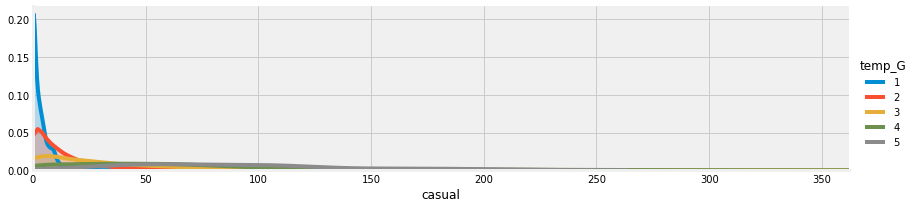

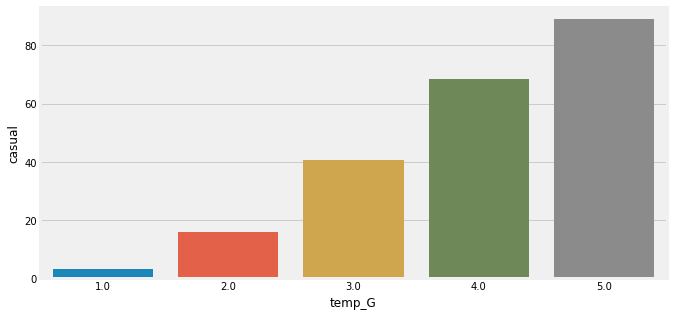

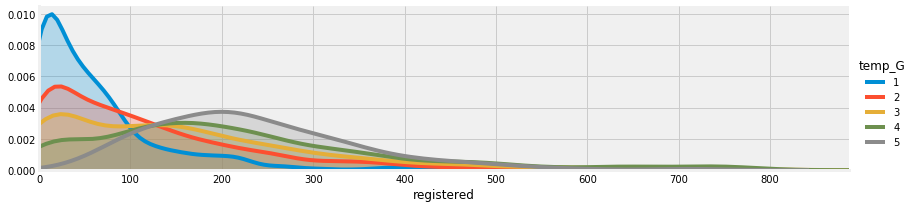

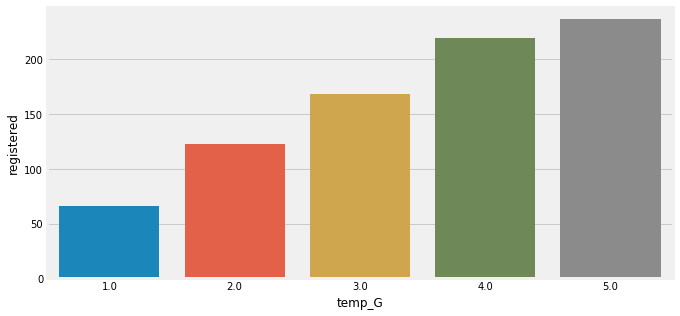

In [55]:
#temp_G - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="temp_G", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_t = data[["casual","temp_G"]].groupby(data['temp_G'],as_index=False).mean()
sns.barplot(x='temp_G', y='casual', data=casual_t)  #temp_G 변수별 평균 대여량

#temp_G - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="temp_G", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

registered_t = data[["registered","temp_G"]].groupby(data['temp_G'],as_index=False).mean()
sns.barplot(x='temp_G', y='registered', data=registered_t)  #temp_G 변수별 평균 대여량

In [56]:
casual_t

,casual,temp_G
0,3.127010,1.0
1,15.916049,2.0
2,40.761664,3.0
3,68.295089,4.0
4,88.923810,5.0


In [57]:
registered_t

,registered,temp_G
0,66.377814,1.0
1,122.660802,2.0
2,168.060327,3.0
3,219.522768,4.0
4,236.476190,5.0


- 온도가 높을 수록 비 가입자/가입자 대여량이 많다

----
2. 체감 온도

1. 총 대여량

In [58]:
#atemp 범주화
#5단위로 분할
bins = np.linspace(0, 50, 6)
bins

array([ 0., 10., 20., 30., 40., 50.])

In [59]:
data['atemp_G'] = np.digitize(data['atemp'], bins)
data.groupby('atemp_G')['atemp'].size()

atemp_G
1     564
2    2640
3    3468
4    2767
5     133
Name: atemp, dtype: int64

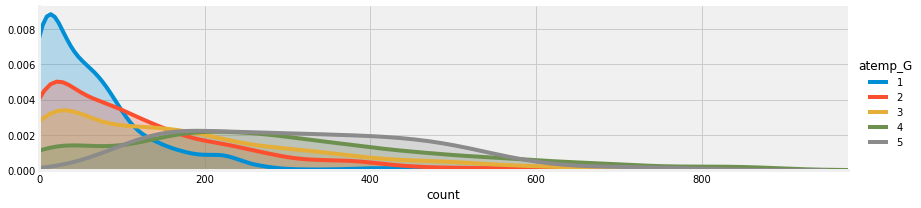

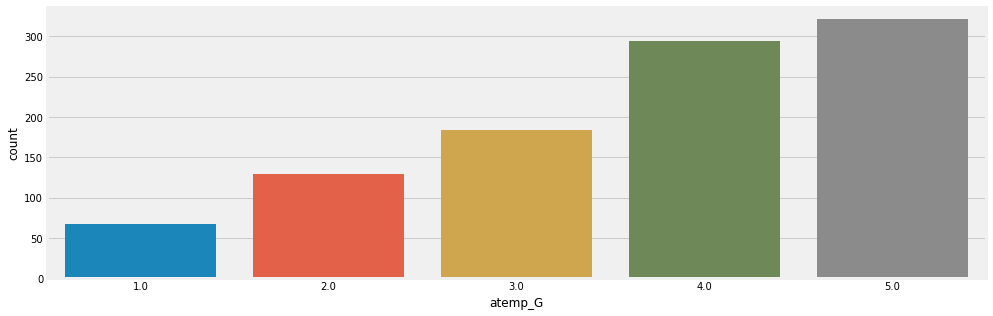

In [60]:
#atemp_G - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="atemp_G", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_a = data[["count","atemp_G"]].groupby(data['atemp_G'],as_index=False).mean()
sns.barplot(x='atemp_G', y='count', data=count_a)  #atemp_G 변수별 평균 대여량

In [61]:
count_a

,count,atemp_G
0,67.255319,1.0
1,128.886742,2.0
2,184.205017,3.0
3,294.219733,4.0
4,320.781955,5.0


- 체감 온도가 높을 수록 총 대여량이 많다

2. 비 가입자 및 가입자의 대여량

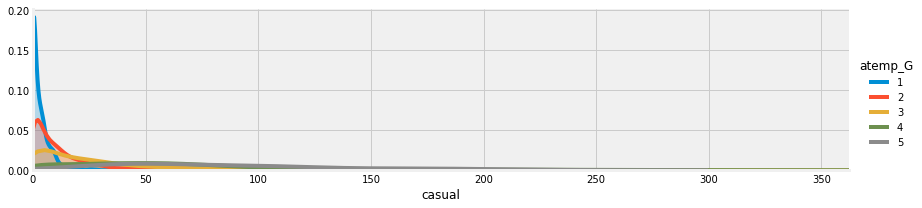

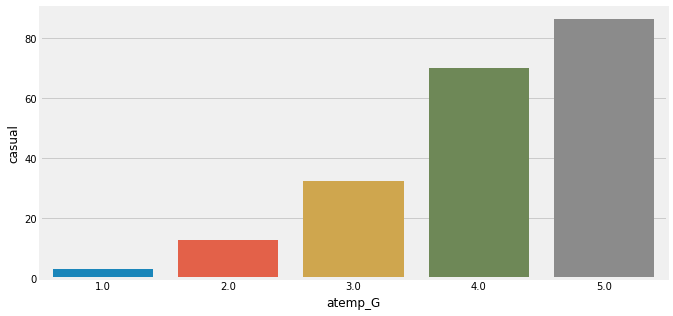

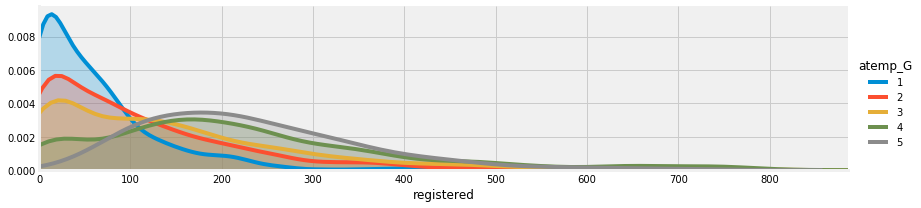

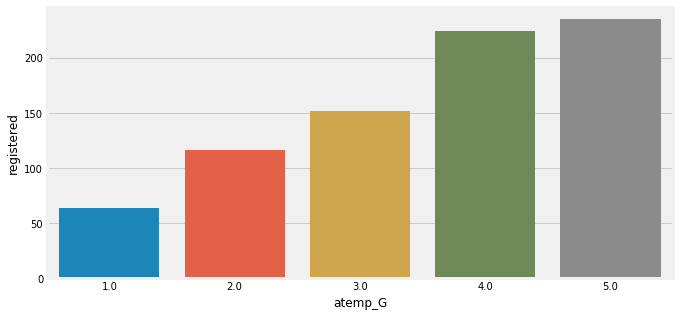

In [62]:
#atemp_G - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="atemp_G", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_a = data[["casual","atemp_G"]].groupby(data['atemp_G'],as_index=False).mean()
sns.barplot(x='atemp_G', y='casual', data=casual_a)  #temp_G 변수별 평균 대여량

#atemp_G - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="atemp_G", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

registered_a = data[["registered","atemp_G"]].groupby(data['atemp_G'],as_index=False).mean()
sns.barplot(x='atemp_G', y='registered', data=registered_a)  #temp_G 변수별 평균 대여량

In [63]:
casual_a

,casual,atemp_G
0,3.195035,1.0
1,12.860227,2.0
2,32.260092,3.0
3,70.077340,4.0
4,86.157895,5.0


In [64]:
registered_a

,registered,atemp_G
0,64.060284,1.0
1,116.026515,2.0
2,151.944925,3.0
3,224.142392,4.0
4,234.624060,5.0


- 체감 온도가 높을 수록 비 가입자/가입자 대여량 많다

앞서, 상관관계를 파악할 때 temp 변수와 atemp 변수 간의 상관관계가 매우 높았고 분포를 살펴본 결과 두 변수 모두 온도가 높을 수록 비 가입자/가입자/총 대여량이 증가한다는 동일한 결과를 확인할 수 있었다.

----

3. 습도

1. 총 대여량

In [65]:
#humidity 범주화
#8단위로 분할
bins = np.linspace(data['humidity'].min(), data['humidity'].max(), 9)
bins

array([  8. ,  19.5,  31. ,  42.5,  54. ,  65.5,  77. ,  88.5, 100. ])

In [66]:
data['humid_G'] = np.digitize(data['humidity'], bins)
data.groupby('humid_G')['humidity'].size()

humid_G
1      44
2     377
3    1353
4    1835
5    1914
6    1641
7    1727
8     556
9     125
Name: humidity, dtype: int64

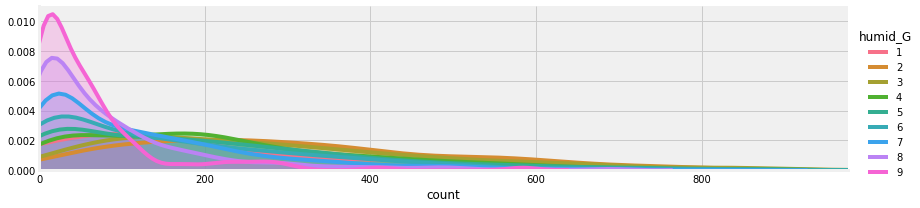

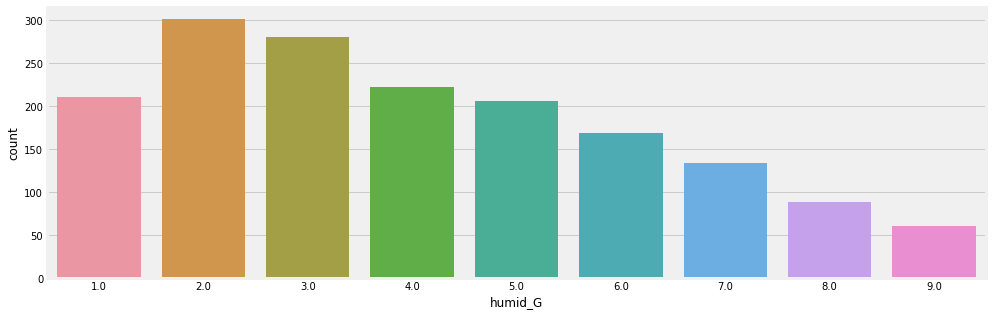

In [67]:
#humid_G - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="humid_G", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_h = data[["count","humid_G"]].groupby(data['humid_G'],as_index=False).mean()
sns.barplot(x='humid_G', y='count', data=count_h)  #humid_G 변수별 평균 대여량

In [68]:
count_h

,count,humid_G
0,211.500000,1.0
1,301.214854,2.0
2,281.168514,3.0
3,222.604905,4.0
4,206.148903,5.0
5,169.351005,6.0
6,134.467863,7.0
7,89.365108,8.0
8,61.072000,9.0


- 아주 습도가 낮은 날씨 보다는 습도가 약 20-30 사이인 경우 가장 대여량이 많다. 오히려, 습도가 아주 낮은 날씨는 습도가 55-65 사이인 경우와 비슷하다.

2. 비 가입자 및 가입자의 대여량

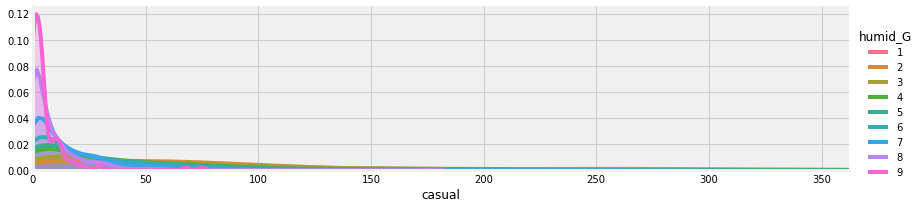

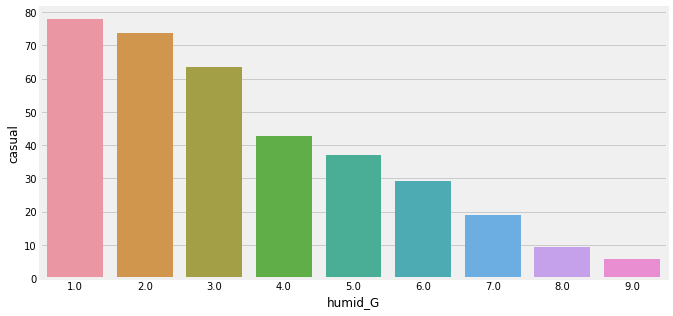

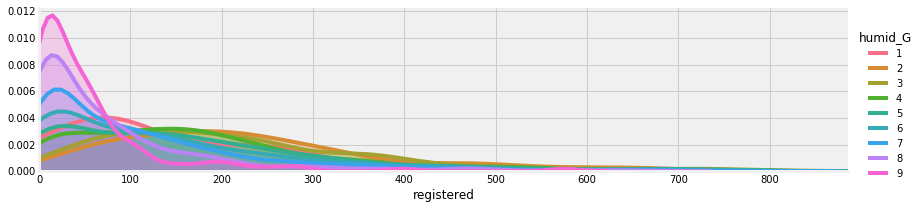

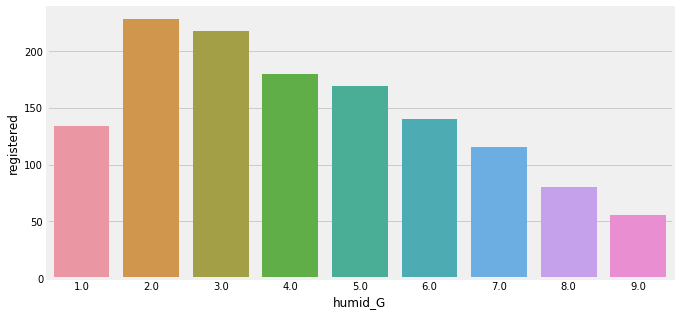

In [69]:
#humid_G - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="humid_G", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_h = data[["casual","humid_G"]].groupby(data['humid_G'],as_index=False).mean()
sns.barplot(x='humid_G', y='casual', data=casual_h)  #humid_G 변수별 평균 대여량

#humid_G - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="humid_G", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

registered_h = data[["registered","humid_G"]].groupby(data['humid_G'],as_index=False).mean()
sns.barplot(x='humid_G', y='registered', data=registered_h)  #humid_G 변수별 평균 대여량

In [70]:
casual_h

,casual,humid_G
0,77.750000,1.0
1,73.538462,2.0
2,63.362897,3.0
3,42.747139,4.0
4,37.014629,5.0
5,29.366849,6.0
6,18.969890,7.0
7,9.278777,8.0
8,5.768000,9.0


In [71]:
registered_h

,registered,humid_G
0,133.750000,1.0
1,227.676393,2.0
2,217.805617,3.0
3,179.857766,4.0
4,169.134274,5.0
5,139.984156,6.0
6,115.497973,7.0
7,80.086331,8.0
8,55.304000,9.0


- 비 가입자의 경우 아주 습도가 낮은 날씨인 경우 가장 대여량이 많고, 습도가 높아질 수록 대여량이 감소한다.

가입자의 경우, 총 대여량과 유사하게 아주 습도가 낮은 날씨 보다는 습도가 약 20-30 사이인 경우 가장 대여량이 많다. 오히려, 습도가 아주 낮은 날씨는 습도가 약 66-77 사이인 경우와 유사하다.

---

4. 바람 세기 (풍속)

1. 총 대여량

In [72]:
#windspeed 범주화
#8단위로 분할
bins = np.linspace(data['windspeed'].min(), data['windspeed'].max(), 9)
bins

array([ 6.0032   , 12.3774125, 18.751625 , 25.1258375, 31.50005  ,
       37.8742625, 44.248475 , 50.6226875, 56.9969   ])

In [73]:
data['wind_G'] = np.digitize(data['windspeed'], bins)
data.groupby('wind_G')['windspeed'].size()

wind_G
1    4082
2    2827
3    1814
4     622
5     160
6      58
7       6
8       1
9       2
Name: windspeed, dtype: int64

In [74]:
data[data['windspeed']>50]

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,log_casual,log_count,log_registered,temp_G,atemp_G,humid_G,wind_G
760,1,1,1,12.30,12.12,42.0,51.9987,0,5,5,1,2011-02-15,-inf,1.609438,1.609438,2,2,3,8
868,1,0,1,18.04,21.97,16.0,50.0021,84,87,171,15,2011-02-19,4.430817,5.141664,4.465908,3,3,1,7
2755,3,0,3,32.80,37.12,49.0,56.9969,181,177,358,17,2011-07-03,5.198497,5.880533,5.176150,4,4,4,9
2756,3,0,3,32.80,37.12,49.0,56.9969,74,107,181,18,2011-07-03,4.304065,5.198497,4.672829,4,4,4,9


windspeed 변수의 분포를 살펴본 결과, windspeed > 50일때 데이터는 총 4건이다. 이때, 56보다 큰 데이터의 경우 count 변수의 값이 count 변수의 평균보다 크므로 특수한 케이스로 판단하여 삭제하였다. 

In [75]:
wind56=data['windspeed']<56
data=data[wind56]

In [76]:
bins = np.linspace(data['windspeed'].min(), data['windspeed'].max(), 8)
bins

array([ 6.0032    , 12.57398571, 19.14477143, 25.71555714, 32.28634286,
       38.85712857, 45.42791429, 51.9987    ])

In [77]:
data['wind_G'] = np.digitize(data['windspeed'], bins)
data.groupby('wind_G')['windspeed'].size()

wind_G
1    4082
2    3503
3    1138
4     622
5     160
6      58
7       6
8       1
Name: windspeed, dtype: int64

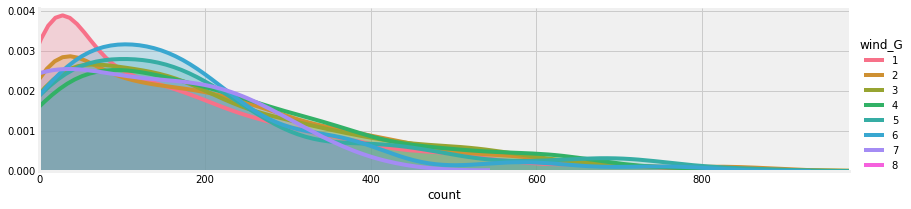

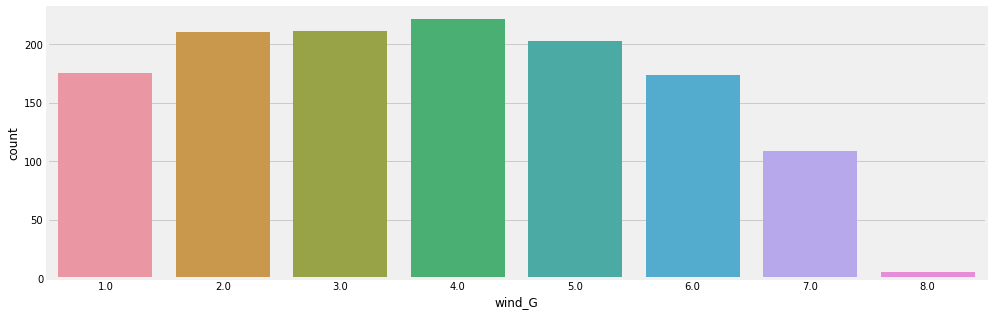

In [78]:
#wind_G - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="wind_G", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))  #plot field

count_w = data[["count","wind_G"]].groupby(data['wind_G'],as_index=False).mean()
sns.barplot(x='wind_G', y='count', data=count_w)  #wind_G 변수별 평균 대여량

In [79]:
count_w

,count,wind_G
0,175.138413,1.0
1,210.617185,2.0
2,210.842707,3.0
3,221.027331,4.0
4,202.562500,5.0
5,173.327586,6.0
6,109.000000,7.0
7,5.000000,8.0


- 풍속의 경우 약 25-32일 때 총 대여량이 가장 많다.

2. 비 가입자 및 가입자의 대여량

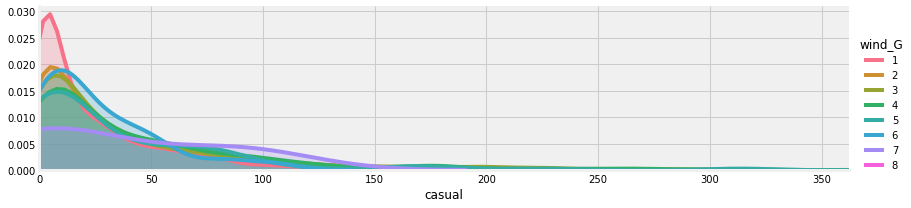

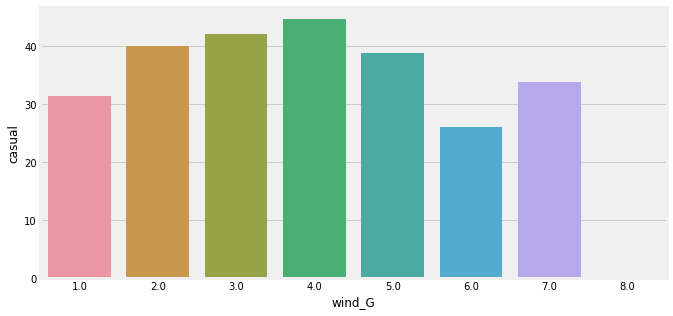

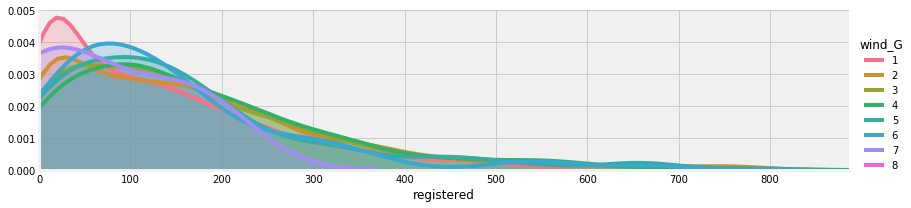

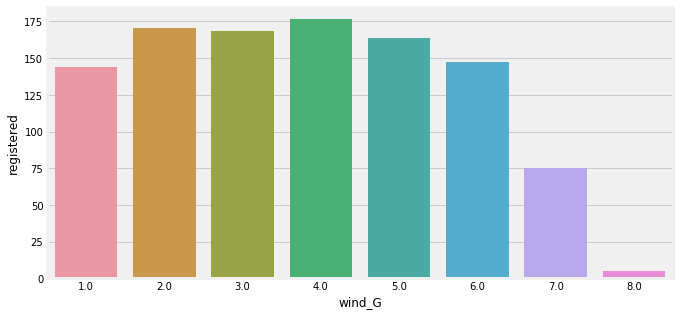

In [80]:
#wind_G - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="wind_G", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_w = data[["casual","wind_G"]].groupby(data['wind_G'],as_index=False).mean()
sns.barplot(x='wind_G', y='casual', data=casual_w)  #wind_G 변수별 평균 대여량

#wind_G - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="wind_G", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

registered_w = data[["registered","wind_G"]].groupby(data['wind_G'],as_index=False).mean()
sns.barplot(x='wind_G', y='registered', data=registered_w)  #wind_G 변수별 평균 대여량

In [81]:
casual_w

,casual,wind_G
0,31.459334,1.0
1,40.137596,2.0
2,42.182777,3.0
3,44.657556,4.0
4,38.868750,5.0
5,26.155172,6.0
6,33.833333,7.0
7,0.000000,8.0


In [82]:
registered_w

,registered,wind_G
0,143.679079,1.0
1,170.479589,2.0
2,168.659930,3.0
3,176.369775,4.0
4,163.693750,5.0
5,147.172414,6.0
6,75.166667,7.0
7,5.000000,8.0


- 비 가입자의 경우, 가입자와 총 대여량의 경우와 달리 풍속이 약 50 이상일 때 대여량이 존재하지 않고 풍속이 38-45일 때 대여량이 45-50일 때 대여량보다 적다.

비 가입자의 대여량의 경우 약간 양상이 다르지만, 대체로 풍속이 25-32일 때 대여량이 가장 많고 정규분포의 형태를 취하고 있다

---
#### 휴일 여부에 대한 분포
1. 총 대여량

Text(0.5, 1.0, 'average of "count" by "workingday"')

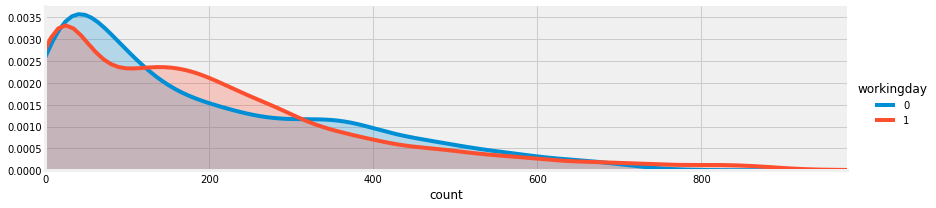

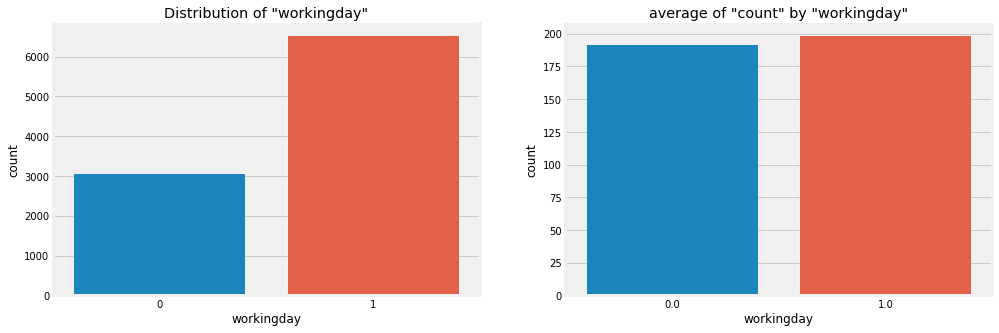

In [83]:
#holiday - count 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="workingday", aspect=4)
facet.map(sns.kdeplot, 'count', shade=True)
facet.set(xlim=(0, data['count'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,2,figsize=(15,5))  #plot field

sns.countplot(x='workingday', data=data, ax=ax[0])  #season 변수 분포
ax[0].set_title('Distribution of "workingday"')

count_work = data[["count","workingday"]].groupby(data['workingday'],as_index=False).mean()
sns.barplot(x='workingday', y='count', data=count_work,ax=ax[1])  #season 변수별 평균 대여량
ax[1].set_title('average of "count" by "workingday"')

In [84]:
count_work

,count,workingday
0,191.050310,0.0
1,197.947765,1.0


- 휴일보다 출근일이 약 2배 많음에도 불구하고, 휴일과 출근일의 총 대여량은 비슷하다.

2. 비 가입자 및 가입자의 대여량

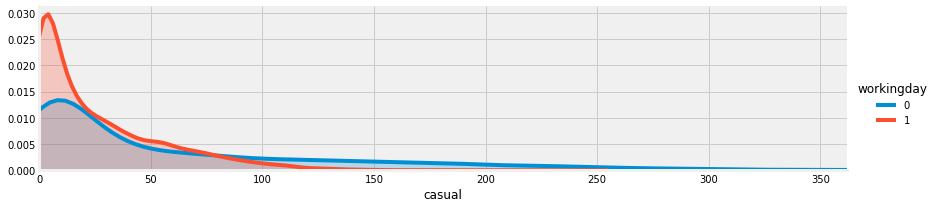

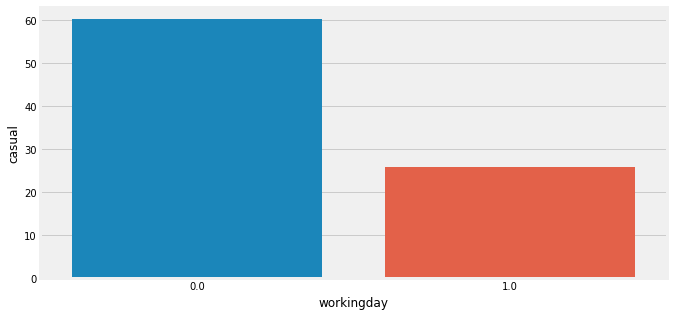

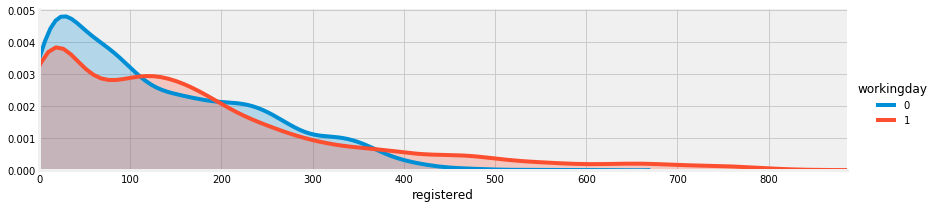

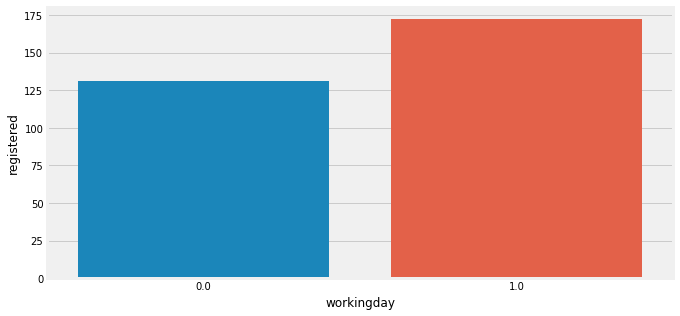

In [85]:
#workingday - casual 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="workingday", aspect=4)
facet.map(sns.kdeplot, 'casual', shade=True)
facet.set(xlim=(0, data['casual'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_work = data[["casual","workingday"]].groupby(data['workingday'],as_index=False).mean()
sns.barplot(x='workingday', y='casual', data=casual_work)  #workingday 변수별 평균 대여량

#workingday - registered 변수 간 관계 시각화(그래프)
facet=sns.FacetGrid(data, hue="workingday", aspect=4)
facet.map(sns.kdeplot, 'registered', shade=True)
facet.set(xlim=(0, data['registered'].max()))
facet.add_legend()

fig,ax = plt.subplots(1,1,figsize=(10,5))  #plot field

casual_work = data[["registered","workingday"]].groupby(data['workingday'],as_index=False).mean()
sns.barplot(x='workingday', y='registered', data=casual_work)  #workingday 변수별 평균 대여량

In [86]:
casual_w

,casual,wind_G
0,31.459334,1.0
1,40.137596,2.0
2,42.182777,3.0
3,44.657556,4.0
4,38.868750,5.0
5,26.155172,6.0
6,33.833333,7.0
7,0.000000,8.0


In [87]:
registered_w

,registered,wind_G
0,143.679079,1.0
1,170.479589,2.0
2,168.659930,3.0
3,176.369775,4.0
4,163.693750,5.0
5,147.172414,6.0
6,75.166667,7.0
7,5.000000,8.0


- 비 가입자의 경우 휴일일 때 대여량이 출근일의 대여량의 약 2배이다. 
- 가입자의 경우 출근일의 대여량이 휴일의 대여량의 약 1.5배이다. 

- 따라서, 비 가입자의 경우 휴일을 즐기면서 즉흥적으로 공유 자전거를 대여한다면, 가입자의 경우 출퇴근 용도로 주기적으로 사용한다고 볼 수 있다. 조금 더 자세한 분석을 위해 시간대와 대여량에 대한 분석을 진행한다.

---
#### 시간대 / 일자별 분석
1. 시간대

1. 총 대여량

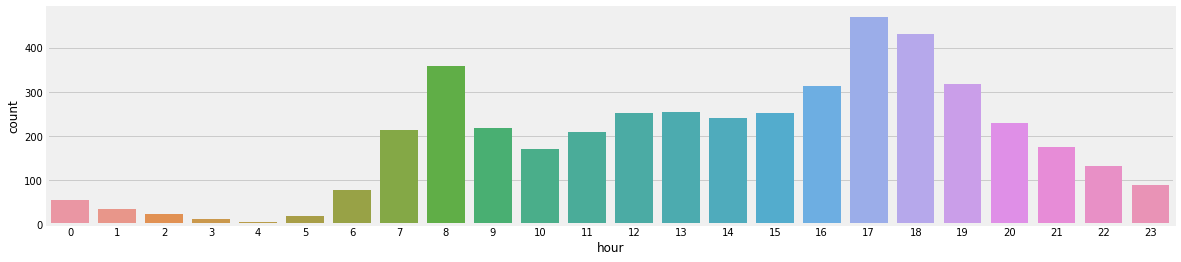

In [88]:
fig, ax=plt.subplots(1, 1, figsize=(18,4))
avg_hour = data[['hour', 'count']].groupby(['hour'], as_index=False).mean()
sns.barplot(x='hour', y='count', data=avg_hour)

- 시간대 별 총 대여량의 분포를 확인한 결과, 출퇴근 시간인 오전 7-8, 오후 17-18시에 대여량이 가장 많은 것을 확인할 수 있다.

2. 비 가입자의 대여량

In [89]:
red = data['workingday'] == 0
work = data['workingday'] != 0

redday = data[red]
workday = data[work]

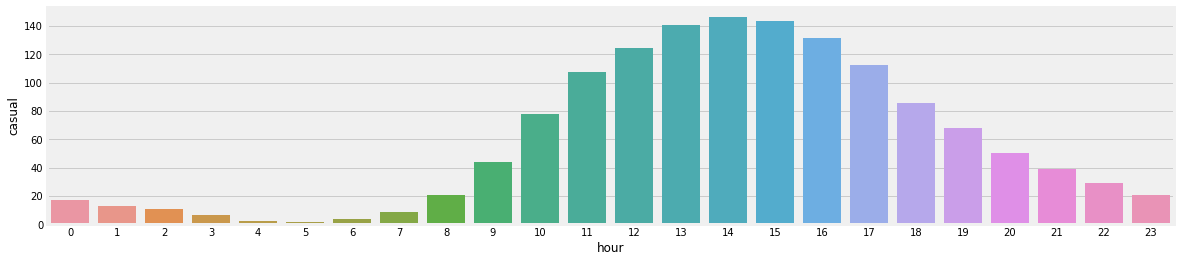

In [90]:
fig, ax=plt.subplots(1, 1, figsize=(18,4))
red_c = redday[['hour', 'casual']].groupby(['hour'], as_index=False).mean()
sns.barplot(x='hour', y='casual', data=red_c)

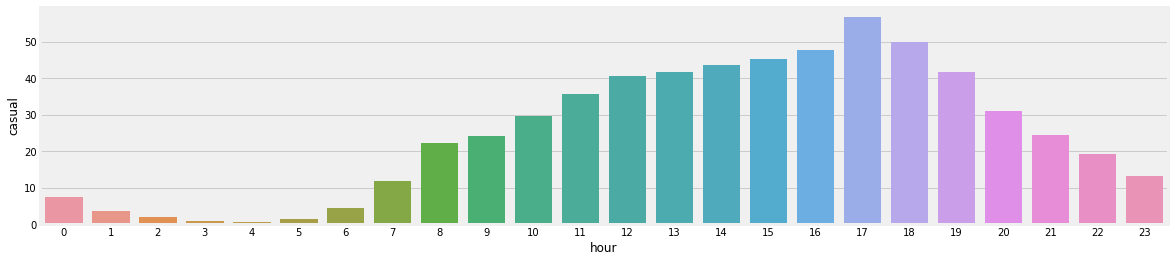

In [91]:
fig, ax=plt.subplots(1, 1, figsize=(18,4))
work_c = workday[['hour', 'casual']].groupby(['hour'], as_index=False).mean()
sns.barplot(x='hour', y='casual', data=work_c)

- 비 가입자의 경우 출근일과 휴일 모두 정규분포와 근사하다. 

3. 가입자의 대여량

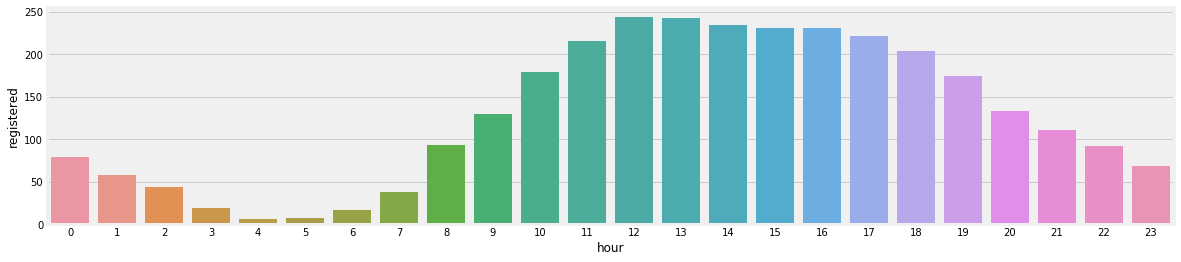

In [92]:
fig, ax=plt.subplots(1, 1, figsize=(18,4))
red_r = redday[['hour', 'registered']].groupby(['hour'], as_index=False).mean()
sns.barplot(x='hour', y='registered', data=red_r)

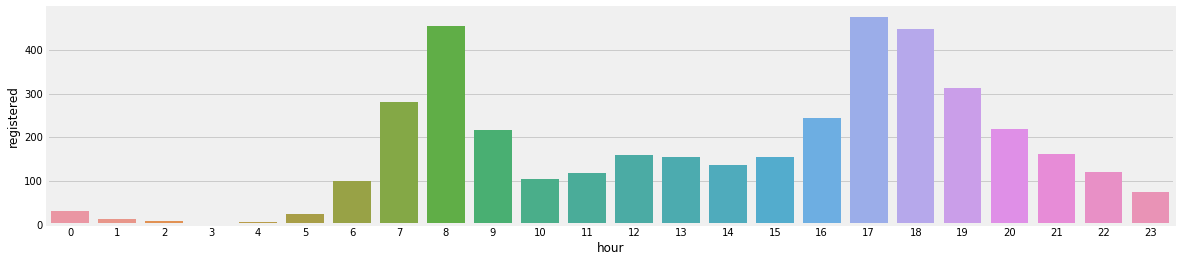

In [93]:
fig, ax=plt.subplots(1, 1, figsize=(18,4))
work_r = workday[['hour', 'registered']].groupby(['hour'], as_index=False).mean()
sns.barplot(x='hour', y='registered', data=work_r)

- 가입자의 경우, 출근일과 휴일 모두 정규분포와 유사했던 비 가입자와 달리 출근일의 경우 출근 시간대와 퇴근 시간대에 명확히 대여량이 증가함을 확인할 수 있다.

2. 일자별

1. 총 대여량

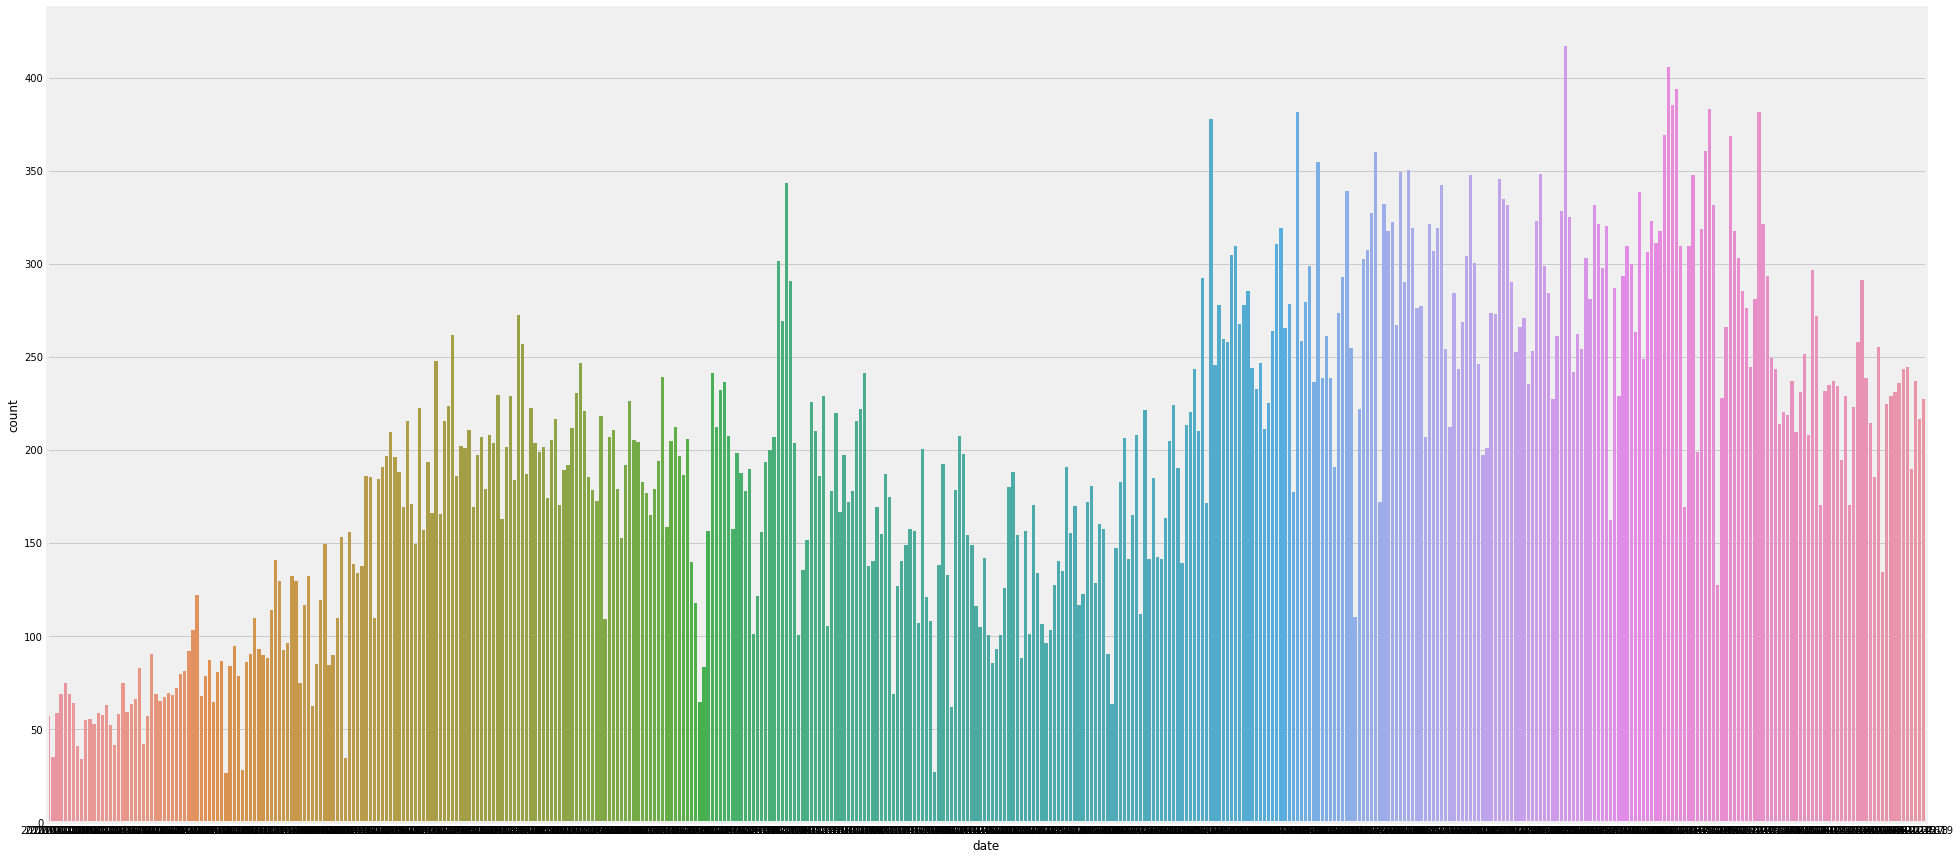

In [94]:
fig, ax=plt.subplots(1, 1, figsize=(30,15))
date_age = data[['date', 'count']].groupby(['date'], as_index=False).mean()
sns.barplot(x='date', y='count', data=date_age)

2. 비 가입자의 대여량

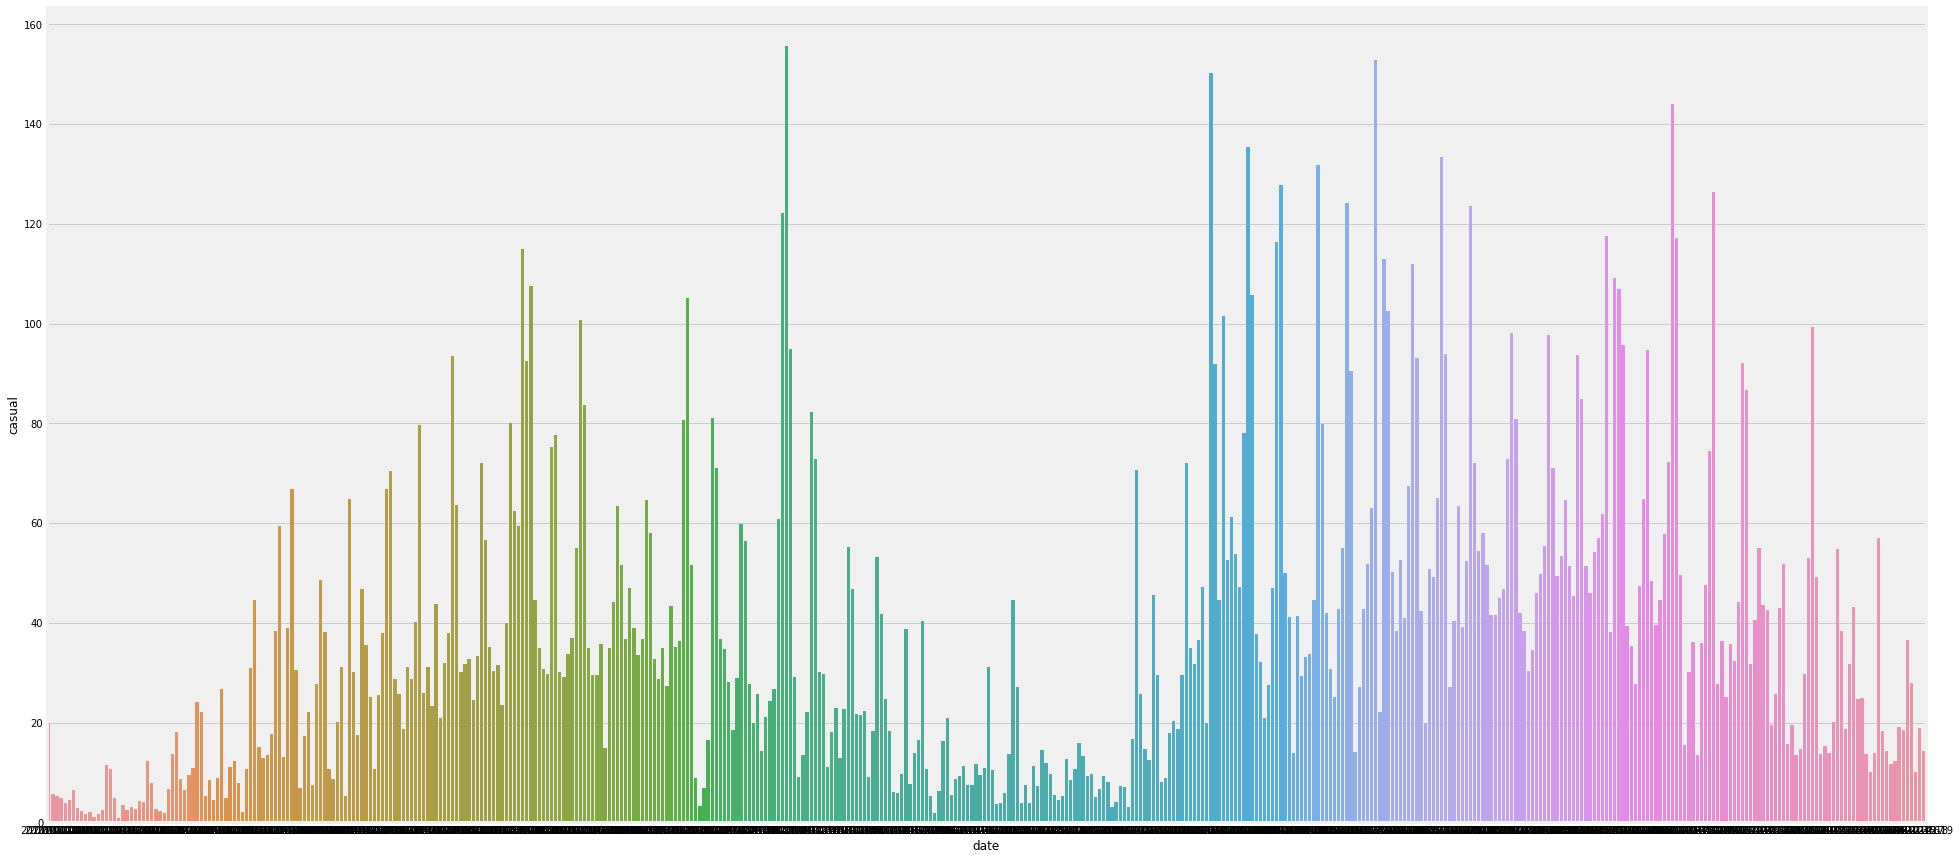

In [95]:
fig, ax=plt.subplots(1, 1, figsize=(30,15))
date_age_c = data[['date', 'casual']].groupby(['date'], as_index=False).mean()
sns.barplot(x='date', y='casual', data=date_age_c)

3. 가입자의 대여량

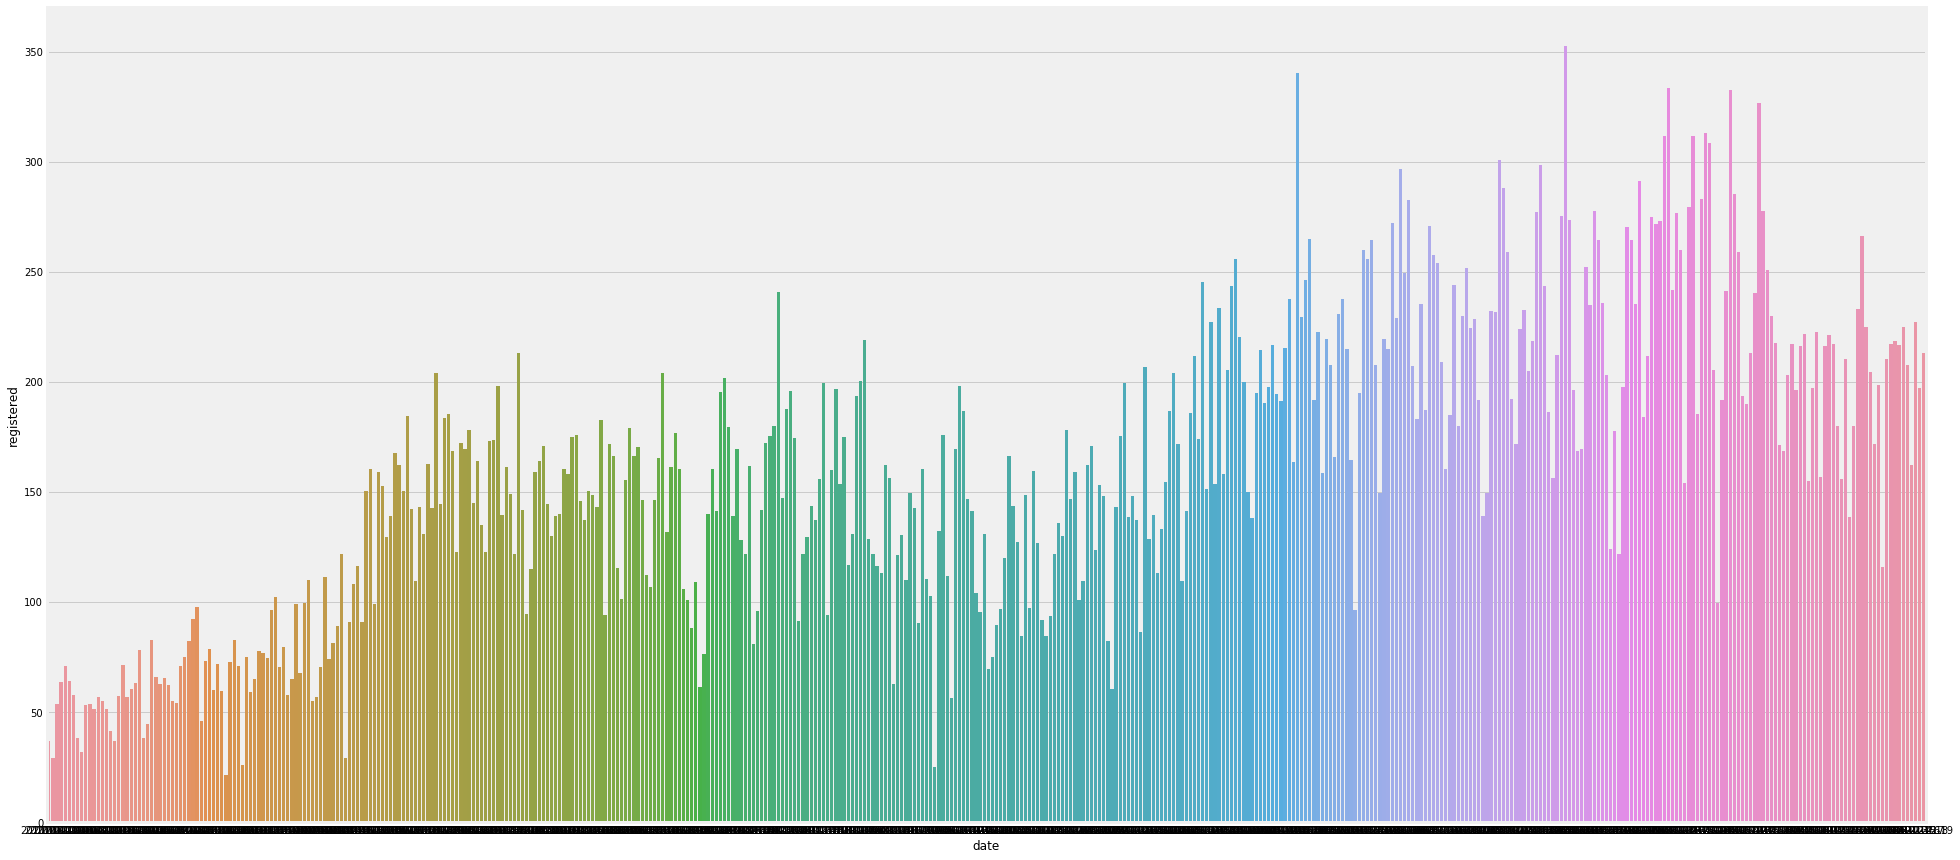

In [96]:
fig, ax=plt.subplots(1, 1, figsize=(30,15))
date_age_r = data[['date', 'registered']].groupby(['date'], as_index=False).mean()
sns.barplot(x='date', y='registered', data=date_age_r)

- 총 대여량을 양상을 보아, 시간이 지날 수록 대여량이 점점 증가함을 확인할 수 있다. 
- 비 가입자의 대여량을 보면, 전체적으로 가입자의 대여량보다 적지만 특정 일자에 급격히 대여량이 증가하는 것을 확인할 수 있다. 이를 통해, 해당 일자에 공유 자전거의 대여량이 증가할만한 이벤트가 존재함을 예측할 수 있다. 

-----
### 생성된 변수
1. hour
2. date
3. log_casual
4. log_count
5. log_registered
6. temp_G
7. atemp_G
8. humid_G
9. wind_G